<a href="https://colab.research.google.com/github/Yash-Haque/Dengue-Drug-Discovery-Network-D3N/blob/data-collection-and-analysis/NER_DENV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install gensim

In [ ]:
!pip install nltk

In [ ]:
!pip install spacy

In [ ]:
!pip install FastText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for FastText: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199769 sha256=b714739c8188bb1b646e333179f21a3fccd76d11bc73ee24f22af62818790d1a
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built FastText


In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import re
import time

import os
import io
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

drive.mount('/content/drive') # Mount Google Drive

import shutil

#import fitz as ft

import nltk

nltk.download('punkt') # To avoid LookUp Error for punkt library
nltk.download('stopwords') # To avoid LookUp Error for punkt library

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

import spacy

import PyPDF2

#from glove import Glove
import gensim

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
import PyPDF2

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_file_path):
    text_content = ""
    try:
        pdf_document = PyPDF2.PdfReader(open(pdf_file_path, 'rb'))
        for page_num in range(len(pdf_document.pages)):
            page = pdf_document.pages[page_num]
            text_content += page.extract_text()
    except Exception as e:
        print(f"An error occurred while extracting text from '{pdf_file_path}': {e}")
    return text_content

# Function to create a folder if it doesn't exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Main function to process PDFs and concatenate text
def process_pdfs(input_folder, output_folder):
    # Create folders for individual corpus and concatenated text
    create_folder(output_folder)

    # Iterate through PDF files in the input folder
    i = 1
    for pdf_file_name in os.listdir(input_folder):
        if pdf_file_name.endswith(".pdf"):
            pdf_file_path = os.path.join(input_folder, pdf_file_name)

            # Extract text from the PDF
            text = extract_text_from_pdf(pdf_file_path)

            # Concatenate text to the overall corpus
            concatenated_text_path = os.path.join(output_folder, "corpus.txt")
            with open(concatenated_text_path, "a", encoding="utf-8") as concat_file:
                concat_file.write(text)

            print(f"All texts of File [{i}] extracted successfully.")
            i += 1

if __name__ == "__main__":
    # Define the folder paths
    input_folder = '/content/drive/MyDrive/Dengue Vaccine Development Papers'
    output_folder = '/content/drive/MyDrive/Fast Text Model Output/Corpus'

    # Process PDFs and concatenate text
    process_pdfs(input_folder, output_folder)


All texts of File [1] extracted successfully.
All texts of File [2] extracted successfully.
All texts of File [3] extracted successfully.
All texts of File [4] extracted successfully.
All texts of File [5] extracted successfully.
All texts of File [6] extracted successfully.
All texts of File [7] extracted successfully.
All texts of File [8] extracted successfully.
All texts of File [9] extracted successfully.
All texts of File [10] extracted successfully.
All texts of File [11] extracted successfully.
All texts of File [12] extracted successfully.
All texts of File [13] extracted successfully.
All texts of File [14] extracted successfully.
All texts of File [15] extracted successfully.
All texts of File [16] extracted successfully.
All texts of File [17] extracted successfully.
All texts of File [18] extracted successfully.
All texts of File [19] extracted successfully.
All texts of File [20] extracted successfully.
All texts of File [21] extracted successfully.
All texts of File [22]

All texts of File [24] extracted successfully.
All texts of File [25] extracted successfully.
All texts of File [26] extracted successfully.
All texts of File [27] extracted successfully.
All texts of File [28] extracted successfully.
All texts of File [29] extracted successfully.
All texts of File [30] extracted successfully.
All texts of File [31] extracted successfully.
All texts of File [32] extracted successfully.
All texts of File [33] extracted successfully.
All texts of File [34] extracted successfully.
All texts of File [35] extracted successfully.
All texts of File [36] extracted successfully.
All texts of File [37] extracted successfully.
All texts of File [38] extracted successfully.
All texts of File [39] extracted successfully.
All texts of File [40] extracted successfully.
All texts of File [41] extracted successfully.
All texts of File [42] extracted successfully.
All texts of File [43] extracted successfully.
All texts of File [44] extracted successfully.
All texts of 

In [ ]:
corpus_text = []  # Initialize an empty list to store the text lines.

# Specify the path to your text file.
file_path = "/content/drive/MyDrive/Fast Text Model Output/Corpus/corpus.txt"  # Replace with the actual file path.

# Open the text file in read mode and load its content into the list.
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Append each line (text) to the corpus list.
        corpus_text.append(line.strip())  # .strip() removes leading/trailing whitespace and newlines

# Convert the list to a single string with space-separated words
corpus = " ".join(corpus_text)

# Print the resulting string
print(corpus)


# Define regex patterns for each label.
protein_pattern = r'\b[A-Z][A-Za-z0-9\s]* protein\b'
gene_pattern = r'[A-Za-z0-9]+\b'  # Simplified gene pattern (customize as needed).
clinical_data_pattern = r'\bP\d{5}\b|\d{4}-\d{2}-\d{2}'  # Matches patient IDs and dates.
geographical_data_pattern = r'[A-Z][a-z]+|[(-]?\d+\.\d+, -?\d+\.\d+[)]?'

# Find matches using regex.
proteins = re.findall(protein_pattern, corpus)
genes = re.findall(gene_pattern, corpus)
clinical_data = re.findall(clinical_data_pattern, corpus)
geographical_data = re.findall(geographical_data_pattern, corpus)

print("Identified Proteins:", proteins)
print("Identified Genes:", genes)
print("Identified Clinical Data:", clinical_data)
print("Identified Geographical Data:", geographical_data)


Review A Review on Dengue Vaccine Development Sheng-Qun Deng1,y, Xian Yang1,y, Yong Wei1, Jia-Ting Chen1, Xiao-Jun Wang2and Hong-Juan Peng1,* 1Department of Pathogen Biology, Guangdong Provincial Key Laboratory of Tropical Disease Research, School of Public Health, Southern Medical University, Guangzhou 510515, China; dengshengqun@163.com (S.-Q.D.); xianluebuzixian28@163.com (X.Y.); smuweiyong@163.com (Y.W.); jiating723@i.smu.edu.cn (J.-T.C.) 2Department of Epidemiology and Biostatistics, School of Public Health, Guangdong Medical University, Dongguan 523808, China; wangxj1664@gdmu.edu.cn *Correspondence: ﬂoriapeng@hotmail.com; Tel.: +86-20-61648526 yThese authors contributed equally to this work. Received: 31 December 2019; Accepted: 31 January 2020; Published: 2 February 2020 /gid00030/gid00035/gid00032/gid00030/gid00038/gid00001/gid00033/gid00042/gid00045 /gid00001 /gid00048/gid00043/gid00031/gid00028/gid00047/gid00032/gid00046 Abstract: Dengue virus (DENV) has become a global healt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def save_to_drive():
  # Define the source file path in Colab and destination folder path in Drive
  source_file_path = '/content/extracted_content/entity_trigger_embeddings_df.csv'  # Replace with your source file path
  destination_folder_path = '/content/drive/My Drive/' # Replace with your destination folder path

  # Copy the file from Colab to Drive
  !cp "$source_file_path" "$destination_folder_path"

  print("File saved to Google Drive.")

def unmount_and_flush_drive():
    drive.flush_and_unmount()

save_to_drive()

File saved to Google Drive.


# **FastText by Facebook**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download(nltk.corpus.reader.wordnet)

AttributeError: ignored

In [ ]:
from nltk.corpus.reader import wordnet
from nltk.stem import WordNetLemmatizer

def lemmatize_words_by_pos(words, pos=None):
    """
    Lemmatize a list of words based on specified parts of speech.

    :param words: List of words to lemmatize.
    :param pos: Part of speech (noun, verb, adverb, adjective, satellite adjective).
                If None, lemmatizes based on the default part of speech (noun).
    :return: List of lemmatized words.
    """
    lemmatizer = WordNetLemmatizer()
    if pos is None:
        pos = 'n'  # Default to noun if pos is not provided

    # Map the provided part of speech to WordNet's POS tags
    pos_mapping = {
        'noun': 'n',
        'verb': 'v',
        'adverb': 'r',
        'adjective': 'a',
        'satellite_adjective': 's'
    }

    # Use the provided POS tag if available, otherwise use the default (noun)
    wn_pos = pos_mapping.get(pos.lower(), 'n')

    # Lemmatize each word based on the specified POS tag
    lemmatized_words = [lemmatizer.lemmatize(word, wn_pos) for word in words]

    return lemmatized_words

# Example usage:
words = ["running", "better", "quickly", "happy", "very"]
lemmatized_nouns = lemmatize_words_by_pos(words, pos='noun')  # Lemmatize as nouns
lemmatized_verbs = lemmatize_words_by_pos(words, pos='verb')  # Lemmatize as verbs
lemmatized_adverbs = lemmatize_words_by_pos(words, pos='adverb')  # Lemmatize as adverbs
lemmatized_adjectives = lemmatize_words_by_pos(words, pos='adjective')  # Lemmatize as adjectives
lemmatized_satellite_adjectives = lemmatize_words_by_pos(words, pos='satellite_adjective')  # Lemmatize as satellite adjectives

print("Lemmatized Nouns:", lemmatized_nouns)
print("Lemmatized Verbs:", lemmatized_verbs)
print("Lemmatized Adverbs:", lemmatized_adverbs)
print("Lemmatized Adjectives:", lemmatized_adjectives)
print("Lemmatized Satellite Adjectives:", lemmatized_satellite_adjectives)


LookupError: ignored

In [ ]:
from gensim.models import FastText
import fasttext
import string
from nltk.stem.wordnet import WordNetLemmatizer as wn
# Import the FastText model from gensim
from gensim.models import FastText as GensimFastText

def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 3: Tokenization
    words = word_tokenize(text)

    # Step 4: Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Step 5: Lemmatization
    words = [wn.lemmatize(word,) for word in words]

    # Join the processed words back into a single string
    processed_text = ' '.join(words)
    print(words)
    return processed_text

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_file_path):
    text_content = ""
    pdf_document = PyPDF2.PdfReader(open(pdf_file_path, 'rb'), strict=False)
    for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()
    return text_content

# Function to create a folder if it doesn't exist
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# Function to apply FastText model to text and save embeddings
def apply_fasttext_to_text(text, output_model_path, output_vectors_path):
    # Preprocess the text
    text = preprocess_text(text)  # Implement your own preprocessing function
    print(text)
    try:
        # Train a FastText model with a lower -minCount value using gensim
        model = GensimFastText(
            sentences=[text],  # Input should be a list of sentences (in this case, a single sentence)
            vector_size=200,  # Adjust the dimension as needed
            min_count=1,  # Minimum word count
            sg=1,  # Skip-gram model
            epochs=10  # Number of training epochs
        )

        # Save the FastText model
        model.save(output_model_path)

        # Save the word vectors
        model.wv.save_word2vec_format(output_vectors_path, binary=False)

        # Inject the word vectors using the 'get_word_vector' function
        ft = GensimFastText.load(output_model_path)  # Load the model

    except Exception as e:
        print(f"An error occurred while training FastText: {e}")

    # Clean up temporary file
    os.remove("temp.txt")

# Main function
def process_pdfs(input_folder, output_folder):
    # Create folders for individual corpus and concatenated text
    i = 1

    individual_corpus_folder = os.path.join(output_folder, "individual_corpus")
    concatenated_text_folder = os.path.join(output_folder, "concatenated_text")
    create_folder(individual_corpus_folder)
    create_folder(concatenated_text_folder)

    # Iterate through PDF files in the input folder
    for pdf_file in os.listdir(input_folder):
        if pdf_file.endswith(".pdf"):
            pdf_path = os.path.join(input_folder, pdf_file)

            # Extract text from the PDF
            text = extract_text_from_pdf(pdf_path)

            print(f"All texts of File [{i}] extracted successfully.")

            # Store individual corpus in separate files
            individual_corpus_path = os.path.join(individual_corpus_folder, pdf_file.replace(".pdf", ".txt"))
            with open(individual_corpus_path, "w", encoding="utf-8") as corpus_file:
                corpus_file.write(text)
            print(f"Individual File created successfully [{i}]")
            # Concatenate text to the overall corpus
            concatenated_text_path = os.path.join(concatenated_text_folder, "concatenated_text.txt")
            with open(concatenated_text_path, "a", encoding="utf-8") as concat_file:
                concat_file.write(text)
            print(f"File [{i}] concatenated successfully.")
            i = i + 1
    # Apply FastText to the concatenated text
    output_model_path = os.path.join(output_folder, "fasttext_model.bin")
    output_vectors_path = os.path.join(output_folder, "fasttext_vectors.vec")
    apply_fasttext_to_text(concatenated_text_path, output_model_path, output_vectors_path)

# Example usage
if __name__ == "__main__":
    input_folder = "/content/drive/MyDrive/Dengue Vaccine Development Papers"
    output_folder = "/content/drive/MyDrive/Fast Text Model Output"
    process_pdfs(input_folder, output_folder)


All texts of File [1] extracted successfully.
Individual File created successfully [1]
File [1] concatenated successfully.
All texts of File [2] extracted successfully.
Individual File created successfully [2]
File [2] concatenated successfully.
All texts of File [3] extracted successfully.
Individual File created successfully [3]
File [3] concatenated successfully.
All texts of File [4] extracted successfully.
Individual File created successfully [4]
File [4] concatenated successfully.
All texts of File [5] extracted successfully.
Individual File created successfully [5]
File [5] concatenated successfully.
All texts of File [6] extracted successfully.
Individual File created successfully [6]
File [6] concatenated successfully.
All texts of File [7] extracted successfully.
Individual File created successfully [7]
File [7] concatenated successfully.
All texts of File [8] extracted successfully.
Individual File created successfully [8]
File [8] concatenated successfully.
All texts of Fil

All texts of File [23] extracted successfully.
Individual File created successfully [23]
File [23] concatenated successfully.
All texts of File [24] extracted successfully.
Individual File created successfully [24]
File [24] concatenated successfully.
All texts of File [25] extracted successfully.
Individual File created successfully [25]
File [25] concatenated successfully.
All texts of File [26] extracted successfully.
Individual File created successfully [26]
File [26] concatenated successfully.
All texts of File [27] extracted successfully.
Individual File created successfully [27]
File [27] concatenated successfully.
All texts of File [28] extracted successfully.
Individual File created successfully [28]
File [28] concatenated successfully.
All texts of File [29] extracted successfully.
Individual File created successfully [29]
File [29] concatenated successfully.
All texts of File [30] extracted successfully.
Individual File created successfully [30]
File [30] concatenated succes

TypeError: ignored

# **Pretrained GLOVE Embeddings**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-08-24 02:33:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-24 02:33:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-24 02:33:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import zipfile

def unzip_glove():
    # Path to the Glove folder in your Google Drive
    glove_folder_path = '/content/drive/MyDrive/Glove'  # Update with your actual folder path

    # Path to the ZIP file to be unzipped
    glove_zip_path = os.path.join(glove_folder_path, 'Glove')

    # Path to the destination folder for unzipping
    unzip_destination_path = os.path.join(glove_folder_path, 'unzipped')

    # Create the destination folder if it doesn't exist
    os.makedirs(unzip_destination_path, exist_ok=True)

    # Unzip the GloVe ZIP file
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_destination_path)

    print("GloVe ZIP file has been successfully extracted to the 'unzipped' folder.")

# Call the function to unzip the GloVe ZIP file
unzip_glove()


GloVe ZIP file has been successfully extracted to the 'unzipped' folder.


In [ ]:
import zipfile
import os

def unzip_fasttext():
    # Path to the FastText folder in your Google Drive
    fasttext_folder_path = '/content/drive/MyDrive/FastText'  # Update with your actual folder path

    # Path to the ZIP file to be unzipped
    fasttext_zip_path = os.path.join(fasttext_folder_path, 'wiki-news-300d-1M-subword.vec.zip')

    # Path to the destination folder for unzipping
    unzip_destination_path = os.path.join(fasttext_folder_path, 'unzipped')

    # Create the destination folder if it doesn't exist
    os.makedirs(unzip_destination_path, exist_ok=True)

    # Unzip the FastText ZIP file
    with zipfile.ZipFile(fasttext_zip_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_destination_path)

    print("FastText ZIP file has been successfully extracted to the 'unzipped' folder.")

# Call the function to unzip the FastText ZIP file
unzip_fasttext()


FastText ZIP file has been successfully extracted to the 'unzipped' folder.


# **Main Classes [READY]**

# **Preprocessing Draft**

In [ ]:
# @ Yashfinul Haque
# V1.2
# USES FASTTEXT
# Alongside the core functionalities, another additional feature was added that ensures that trigger, entity and result embeddings all have the same dimensions, and are valid.

class EntityTriggerAssociation:
  def __init__(self):
    self.nlp = spacy.load("en_core_web_sm")
    self._entities_list = []
    self._triggers_list = []
    self._entity_trigger_pairs = []

  def _is_entity(self, token):
    return token.pos_ in ['NOUN', 'PROPN']

  def _is_trigger(self, token):
    return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

  def process_and_get_association(self, cleaned_sentences):
    print("Cleaned sentence received.")
    self.process_sentences(cleaned_sentences)

    for sentence_entities, sentence_triggers in zip(self.get_entities_list(), self.get_triggers_list()):
      entity_triggers_in_sentence = []
      entity = None  # Initialize entity and trigger variables
      trigger = None

      for token_entity, token_trigger in zip(sentence_entities, sentence_triggers):
        if token_entity:  # Check if the token is an entity
          entity = token_entity
        elif token_trigger:  # Check if the token is a trigger
          trigger = token_trigger
          if entity and trigger:  # If both entity and trigger are found, add the pair
            entity_triggers_in_sentence.append((entity, trigger))
            entity = None  # Reset entity and trigger for the next pair
            trigger = None

      self._entity_trigger_pairs.extend(entity_triggers_in_sentence)
    return self.get_entities_list(), self.get_triggers_list(),self.get_entity_trigger_pairs()

  def _process_sentence(self, sentence):
    try:
      doc = self.nlp(sentence)
      sentence_entities = []
      sentence_triggers = []

      for token in doc:
        is_entity_token = self._is_entity(token)
        is_trigger_token = self._is_trigger(token)

        if is_entity_token:
          sentence_entities.append(token.text)
        if is_trigger_token:
          sentence_triggers.append(token.text)
      print("Sentence has been processed.")
      return sentence_entities, sentence_triggers

    except Exception as e:
      print(f"An error occurred in function process_sentence() from Class EntityTriggerAssociation: {e}")

  def process_sentences(self, cleaned_sentences):
    try:
      print("Processing Sentences.")
      for sentence in cleaned_sentences:
        sentence_entities, sentence_triggers = self._process_sentence(sentence)
        self._entities_list.append(sentence_entities)
        self._triggers_list.append(sentence_triggers)
      print(f"Updated enitities list: {self._entities_list}")
      print(f"Updated triggers list: {self._triggers_list}")
      print("ALL SENTENCES HAVE BEEN PROCESSED SUCCESSFULLY.")

    except Exception as e:
      print(f"An error occurred in function process_sentences() from Class EntityTriggerAssociation: {e}")

  def get_entities_list(self):
      return self._entities_list

  def get_triggers_list(self):
      return self._triggers_list

  def get_entity_trigger_pairs(self):
      return self._entity_trigger_pairs

  # No set_entities_list or set_triggers_list because we do not want the user to be able to change the lists as of yet.

class Preprocessing:
  def __init__(self):
    super().__init__()
    self.nlp = spacy.load("en_core_web_sm")
    self.result_dataframe = None
    self.entity_embedding_df = None
    self.trigger_embedding_df = None
    self.entity_trigger_pair_embedding_df = None

  def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe,  entity_trigger_embeddings_df, folder_path):
    try:
      entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
      trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
      result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)
      entity_trigger_embeddings_df.to_csv(f'{folder_path}/entity_trigger_embeddings_df.csv', index=False)
      print("Dataframes saved successfully.")
    except Exception as e:
      print(f"An error occured while saving dataframes: {e}")

  def assign_entity_trigger_pair_embeddings(self, entity_trigger_pairs, word_vectors, embedding_dimension=200):
    try:
      entity_trigger_pair_embeddings = []

      for entity, trigger in entity_trigger_pairs:
        if entity in word_vectors and trigger in word_vectors:
          entity_embedding = word_vectors[entity]
          trigger_embedding = word_vectors[trigger]

          # Calculate xi_ej_tj embedding for the pair
          xi_ej_tj_embedding = np.concatenate((entity_embedding, trigger_embedding))
          entity_trigger_pair_embeddings.append((entity, trigger, xi_ej_tj_embedding))
      return entity_trigger_pair_embeddings
    except Exception as e:
      print(f"Error in function assign_entity_trigger_pair_embeddings(): {e}")

  def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
    try:
      entities_triggers_association = EntityTriggerAssociation()

      os.makedirs('extracted_content', exist_ok=True)
      pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
      pdf_path = os.path.join(folder_path, pdf_file)

      pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
      text_content = ""
      for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()

      cleaned_sentences = []
      sentences = sent_tokenize(text_content)
      stop_words = set(stopwords.words("english"))
      for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

      print(f"Cleaned Sentences: {cleaned_sentences}")
      extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
      sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

      with open(extracted_text_path, 'w', encoding='utf-8') as f:
        f.write(text_content)

      with open(sentences_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))


      # Load pre-trained FastText model (change the path to your FastText model file)
#      fasttext_model = gensim.models.fasttext.load_facebook_vectors(fasttext_file_path)

      # Calculate FastText embeddings for your tokens
      word_vectors = gensim.models.fasttext.load_facebook_vectors(fasttext_file_path)  # Use word vectors from FastText model

      # Rest of your code remains the same

      embedding_dimension = 300  # Adjust the embedding dimension to match your FastText model

      df_data = []
      entity_list, trigger_list, entity_trigger_pair_list = entities_triggers_association.process_and_get_association(cleaned_sentences)
      print("Entity List:",entity_list)
      print("Trigger List:", trigger_list)
      entity_embeddings_list = []
      trigger_embeddings_list = []

      entity_trigger_pairs = self.assign_entity_trigger_pair_embeddings(entity_list, trigger_list, word_vectors)
      entity_trigger_pair_embeddings = []  # Initialize an empty list

      for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities_triggers_association.get_entities_list(), entities_triggers_association.get_triggers_list()):
        preprocessed_sentence = self.preprocess_text(sentence)
        doc = self.nlp(sentence)
        entity_embeddings = np.zeros((len(doc), embedding_dimension))
        trigger_embeddings = np.zeros((len(doc), embedding_dimension))

        for i, token in enumerate(doc):
          if token.text in entity_list and token.text in word_vectors:
            print("Entity:", token)
            entity_embedding = word_vectors[token.text]
            entity_embeddings[i] = entity_embedding
            print("Entity Embeddings: ", entity_embeddings[i])

          if token.text in trigger_list and token.text in word_vectors:
            print("Trigger:", token)
            trigger_embedding = word_vectors[token.text]
            trigger_embeddings[i] = trigger_embedding
            print("Entity Embeddings: ", entity_embeddings[i])


        # Check if there are any missing embeddings and fill with zeros
        missing_entity_indices = [i for i, token in enumerate(doc) if token.text in entity_list and token.text not in word_vectors]
        missing_trigger_indices = [i for i, token in enumerate(doc) if token.text in trigger_list and token.text not in word_vectors]

        for i in missing_entity_indices:
          entity_embeddings[i] = np.zeros(embedding_dimension)

        for i in missing_trigger_indices:
          trigger_embeddings[i] = np.zeros(embedding_dimension)

        entity_trigger_pair_embeddings.extend(self.assign_entity_trigger_pair_embeddings(
                    [(entity, trigger) for entity in entity_list for trigger in trigger_list], word_vectors
                ))

        entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
        trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))

        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

        # Calculate the maximum number of embeddings
        max_embeddings = max(len(entity_embeddings_list), len(trigger_embeddings_list))

        # Fill missing embeddings with zeros and ensure they have the same number of rows
        while len(entity_embeddings_list) < max_embeddings:
          entity_embeddings_list.append(np.zeros(embedding_dimension))

        while len(trigger_embeddings_list) < max_embeddings:
          trigger_embeddings_list.append(np.zeros(embedding_dimension))

      self.result_dataframe = pd.DataFrame(df_data)
      self.entity_embedding_df = pd.DataFrame({'Entity': entities_triggers_association.get_entities_list(), 'Embedding': entity_embeddings_list})
      self.trigger_embedding_df = pd.DataFrame({'Trigger': entities_triggers_association.get_triggers_list(), 'Embedding': trigger_embeddings_list})
      self.entity_trigger_embeddings_df = pd.DataFrame(entity_trigger_pair_embeddings, columns=['Entity', 'Trigger', 'Embedding'])

      self.save_dataframes(self.entity_embedding_df, self.trigger_embedding_df, self.result_dataframe, self.entity_trigger_embeddings_df, save_folder_path)

      return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df
    except Exception as e:
      print(f"An error occured in function pdf_processor() from Class Preprocessing: {e} ")

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    fasttext_file_path = "/content/drive/MyDrive/Fast Text Model Output/fasttext_model.bin"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, fasttext_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)



An error occured in function pdf_processor() from Class Preprocessing: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/Genomics, proteomics and evolution of dengue virus.pdf' 


TypeError: ignored

*Our intuition is that the desired representation of the
entity triggers should involve the semantics with the hidden
states of the tokens from the sentence in a shared embedding
space. Specifically, for a sentence S = w1, w2, . . . , wn with
multiple entities e1, e2, . . . , ek, we assume that there is a set
of triggers Ti = t1, t2, . . . , tn. We reformat the input of our
model to enable efficient batch training. Each entity is linked
to one of its corresponding trigger denoted as (x, ei
, tj ), where
x is the tokenization list of the sentence S. For each reformed
training batch, we first apply a bidirectional LSTM on the
sequence of word vectors of x using Glove word embedding
[22]. It returns the hidden states hi of each token xi
, and H is
denoted as the matrix containing the embedding representation
for all the tokens; Z is denoted as the matrix containing the
embedding representation for all the trigger T.*

In [ ]:
# @ Yashfinul Haque
# V1.1.1
# Alongside the core functionalities, another additional feature was added that ensures that trigger, entity and result embeddings all have the same dimensions, and are valid.

class EntityTriggerAssociation:
  def __init__(self):
    self.nlp = spacy.load("en_core_web_sm")
    self._entities_list = []
    self._triggers_list = []
    self._entity_trigger_pairs = []

  def _is_entity(self, token):
    return token.pos_ in ['NOUN', 'PROPN']

  def _is_trigger(self, token):
    return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

  def process_and_get_association(self, cleaned_sentences):
    print("Cleaned sentence received.")
    self.process_sentences(cleaned_sentences)

    for sentence_entities, sentence_triggers in zip(self.get_entities_list(), self.get_triggers_list()):
      entity_triggers_in_sentence = []
      entity = None  # Initialize entity and trigger variables
      trigger = None

      for token_entity, token_trigger in zip(sentence_entities, sentence_triggers):
        if token_entity:  # Check if the token is an entity
          entity = token_entity
        elif token_trigger:  # Check if the token is a trigger
          trigger = token_trigger
          if entity and trigger:  # If both entity and trigger are found, add the pair
            entity_triggers_in_sentence.append((entity, trigger))
            entity = None  # Reset entity and trigger for the next pair
            trigger = None

      self._entity_trigger_pairs.extend(entity_triggers_in_sentence)
    return self.get_entities_list(), self.get_triggers_list(),self.get_entity_trigger_pairs()

  def _process_sentence(self, sentence):
    try:
      doc = self.nlp(sentence)
      sentence_entities = []
      sentence_triggers = []

      for token in doc:
        is_entity_token = self._is_entity(token)
        is_trigger_token = self._is_trigger(token)

        if is_entity_token:
          sentence_entities.append(token.text)
        if is_trigger_token:
          sentence_triggers.append(token.text)
      print("Sentence has been processed.")
      return sentence_entities, sentence_triggers

    except Exception as e:
      print(f"An error occurred in function process_sentence() from Class EntityTriggerAssociation: {e}")

  def process_sentences(self, cleaned_sentences):
    try:
      print("Processing Sentences.")
      for sentence in cleaned_sentences:
        sentence_entities, sentence_triggers = self._process_sentence(sentence)
        self._entities_list.append(sentence_entities)
        self._triggers_list.append(sentence_triggers)
      print(f"Updated enitities list: {self._entities_list}")
      print(f"Updated triggers list: {self._triggers_list}")
      print("ALL SENTENCES HAVE BEEN PROCESSED SUCCESSFULLY.")

    except Exception as e:
      print(f"An error occurred in function process_sentences() from Class EntityTriggerAssociation: {e}")

  def get_entities_list(self):
      return self._entities_list

  def get_triggers_list(self):
      return self._triggers_list

  def get_entity_trigger_pairs(self):
      return self._entity_trigger_pairs

  # No set_entities_list or set_triggers_list because we do not want the user to be able to change the lists as of yet.

class Preprocessing:
  def __init__(self):
    super().__init__()
    self.nlp = spacy.load("en_core_web_sm")
    self.result_dataframe = None
    self.entity_embedding_df = None
    self.trigger_embedding_df = None
    self.entity_trigger_pair_embedding_df = None

  def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe,  entity_trigger_embeddings_df, folder_path):
    try:
      entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
      trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
      result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)
      entity_trigger_embeddings_df.to_csv(f'{folder_path}/entity_trigger_embeddings_df.csv', index=False)
      print("Dataframes saved successfully.")
    except Exception as e:
      print(f"An error occured while saving dataframes: {e}")


  def glove_extractor(self, glove_file_path):
    glove_vectors = {}

    try:
      with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
          values = line.strip().split()
          if len(values) < 2:
            print(f"Invalid line format at line {line_num + 1}: {line}")
            continue
          word = values[0]
          vector = np.array(values[1:], dtype=np.float32)
          glove_vectors[word] = vector
      print(f"Glove Extraction successful.")
      return glove_vectors
    except Exception as e:
      print(f"Error loading GloVe embeddings: {e}")
      return {}

  def assign_entity_trigger_pair_embeddings(self, entity_trigger_pairs, word_vectors, embedding_dimension=200):
    try:
      entity_trigger_pair_embeddings = []

      for entity, trigger in entity_trigger_pairs:
        if entity in word_vectors and trigger in word_vectors:
          entity_embedding = word_vectors[entity]
          trigger_embedding = word_vectors[trigger]

          # Calculate xi_ej_tj embedding for the pair
          xi_ej_tj_embedding = np.concatenate((entity_embedding, trigger_embedding))
          entity_trigger_pair_embeddings.append((entity, trigger, xi_ej_tj_embedding))
      return entity_trigger_pair_embeddings
    except Exception as e:
      print(f"Error in function assign_entity_trigger_pair_embeddings(): {e}")

  def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
    try:
      entities_triggers_association = EntityTriggerAssociation()

      os.makedirs('extracted_content', exist_ok=True)
      pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
      pdf_path = os.path.join(folder_path, pdf_file)

      pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
      text_content = ""
      for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()

      cleaned_sentences = []
      sentences = sent_tokenize(text_content)
      stop_words = set(stopwords.words("english"))
      for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

      print(f"Cleaned Sentences: {cleaned_sentences}")
      extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
      sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

      with open(extracted_text_path, 'w', encoding='utf-8') as f:
        f.write(text_content)

      with open(sentences_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))


      word_vectors = self.glove_extractor(glove_file_path)  # Load GloVe vectors
      embedding_dimension = 200
      df_data = []
      entity_list, trigger_list, entity_trigger_pair_list = entities_triggers_association.process_and_get_association(cleaned_sentences)
      print("Entity List:",entity_list)
      print("Trigger List:", trigger_list)
      entity_embeddings_list = []
      trigger_embeddings_list = []

      entity_trigger_pairs = self.assign_entity_trigger_pair_embeddings(entity_list, trigger_list, word_vectors)
      entity_trigger_pair_embeddings = []  # Initialize an empty list

      for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities_triggers_association.get_entities_list(), entities_triggers_association.get_triggers_list()):
        doc = self.nlp(sentence)
        entity_embeddings = np.zeros((len(doc), embedding_dimension))
        trigger_embeddings = np.zeros((len(doc), embedding_dimension))

        for i, token in enumerate(doc):
          if token.text in entity_list and token.text in word_vectors:
            print("Entity:", token)
            entity_embedding = word_vectors[token.text]
            entity_embeddings[i] = entity_embedding
            print("Entity Embeddings: ", entity_embeddings[i])

          if token.text in trigger_list and token.text in word_vectors:
            print("Trigger:", token)
            trigger_embedding = word_vectors[token.text]
            trigger_embeddings[i] = trigger_embedding
            print("Entity Embeddings: ", entity_embeddings[i])


        # Check if there are any missing embeddings and fill with zeros
        missing_entity_indices = [i for i, token in enumerate(doc) if token.text in entity_list and token.text not in word_vectors]
        missing_trigger_indices = [i for i, token in enumerate(doc) if token.text in trigger_list and token.text not in word_vectors]

        for i in missing_entity_indices:
          entity_embeddings[i] = np.zeros(embedding_dimension)

        for i in missing_trigger_indices:
          trigger_embeddings[i] = np.zeros(embedding_dimension)

        entity_trigger_pair_embeddings.extend(self.assign_entity_trigger_pair_embeddings(
                    [(entity, trigger) for entity in entity_list for trigger in trigger_list], word_vectors
                ))

        entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
        trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))

        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

        # Calculate the maximum number of embeddings
        max_embeddings = max(len(entity_embeddings_list), len(trigger_embeddings_list))

        # Fill missing embeddings with zeros and ensure they have the same number of rows
        while len(entity_embeddings_list) < max_embeddings:
          entity_embeddings_list.append(np.zeros(embedding_dimension))

        while len(trigger_embeddings_list) < max_embeddings:
          trigger_embeddings_list.append(np.zeros(embedding_dimension))

      self.result_dataframe = pd.DataFrame(df_data)
      self.entity_embedding_df = pd.DataFrame({'Entity': entities_triggers_association.get_entities_list(), 'Embedding': entity_embeddings_list})
      self.trigger_embedding_df = pd.DataFrame({'Trigger': entities_triggers_association.get_triggers_list(), 'Embedding': trigger_embeddings_list})
      self.entity_trigger_embeddings_df = pd.DataFrame(entity_trigger_pair_embeddings, columns=['Entity', 'Trigger', 'Embedding'])

      self.save_dataframes(self.entity_embedding_df, self.trigger_embedding_df, self.result_dataframe, self.entity_trigger_embeddings_df, save_folder_path)

      return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df
    except Exception as e:
      print(f"An error occured in function pdf_processor() from Class Preprocessing: {e} ")

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)



Streaming output truncated to the last 5000 lines.
 -1.16069996e+00  8.80609989e-01  5.36239982e-01  4.31620002e-01
 -2.61750013e-01  8.84119987e-01 -1.15820003e+00  7.27970004e-01
  5.46379983e-01 -2.29699999e-01  6.02880001e-01 -2.04669997e-01
  3.48459989e-01 -5.19200005e-02  2.71319985e-01  2.54869998e-01
 -2.46419996e-01  5.39200008e-02  9.66470003e-01 -6.08810008e-01
  9.52509999e-01 -6.91519976e-01  7.51380026e-01  7.38030016e-01
  3.08440000e-01  1.66280001e-01 -6.99119985e-01 -4.73659992e-01
 -4.00009990e-01  1.91159993e-02  4.48720008e-01 -7.81989992e-02
  6.52490020e-01 -3.35249990e-01  3.74929994e-01 -1.34350002e-01
  3.87010008e-01  2.68370003e-01  8.89509976e-01  8.54690015e-01
 -5.57980001e-01 -2.92059988e-01  1.19439995e+00 -8.45109999e-01
  6.32839978e-01  2.95490008e-02 -5.98060004e-02  1.06890000e-01
 -1.84039995e-01  4.94439989e-01 -5.62699974e-01 -1.77180007e-01
  4.57300007e-01  2.50170007e-02 -2.52680004e-01 -2.96530008e-01
  2.84969985e-01 -1.44569993e-01  7.680

In [ ]:
# @ Yashfinul Haque
# v1 [31/08/23]

class EntityTriggerAssociation:
  def __init__(self):
    self.nlp = spacy.load("en_core_web_sm")
    self._entities_list = []
    self._triggers_list = []
    self._entity_trigger_pairs = []
  def _is_entity(self, token):
    return token.pos_ in ['NOUN', 'PROPN']

  def _is_trigger(self, token):
    return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

  def process_and_get_association(self, cleaned_sentences):
    print("Cleaned sentence received.")
    self.process_sentences(cleaned_sentences)

    return self.get_entities_list(), self.get_triggers_list()

  def _process_sentence(self, sentence):
    try:
      doc = self.nlp(sentence)
      sentence_entities = []
      sentence_triggers = []

      for token in doc:
        is_entity_token = self._is_entity(token)
        is_trigger_token = self._is_trigger(token)

        if is_entity_token:
          sentence_entities.append(token.text)
        if is_trigger_token:
          sentence_triggers.append(token.text)
      print("Sentence has been processed.")
      return sentence_entities, sentence_triggers

    except Exception as e:
      print(f"An error occurred in function process_sentence() from Class EntityTriggerAssociation: {e}")

  def process_sentences(self, cleaned_sentences):
    try:
      print("Processing Sentences.")
      for sentence in cleaned_sentences:
        sentence_entities, sentence_triggers = self._process_sentence(sentence)
        self._entities_list.append(sentence_entities)
        self._triggers_list.append(sentence_triggers)
      print(f"Updated enitities list: {self._entities_list}")
      print(f"Updated triggers list: {self._triggers_list}")
      print("ALL SENTENCES HAVE BEEN PROCESSED SUCCESSFULLY.")

    except Exception as e:
      print(f"An error occurred in function process_sentences() from Class EntityTriggerAssociation: {e}")

  def get_entities_list(self):
      return self._entities_list

  def get_triggers_list(self):
      return self._triggers_list

  # No set_entities_list or set_triggers_list because we do not want the user to be able to change the lists as of yet.

class Preprocessing:
  def __init__(self):
    super().__init__()
    self.nlp = spacy.load("en_core_web_sm")
    self.result_dataframe = None
    self.entity_embedding_df = None
    self.trigger_embedding_df = None

  def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe, folder_path):
    try:
      entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
      trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
      result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)
      print("Dataframes saved successfully.")
    except Exception as e:
      print(f"An error occured while saving dataframes: {e}")


  def glove_extractor(self, glove_file_path):
    glove_vectors = {}

    try:
      with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
          values = line.strip().split()
          if len(values) < 2:
            print(f"Invalid line format at line {line_num + 1}: {line}")
            continue
          word = values[0]
          vector = np.array(values[1:], dtype=np.float32)
          glove_vectors[word] = vector
      print(f"Glove Extraction successful.")
      return glove_vectors
    except Exception as e:
      print(f"Error loading GloVe embeddings: {e}")
      return {}

  def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
    try:
      entities_triggers_association = EntityTriggerAssociation()

      os.makedirs('extracted_content', exist_ok=True)
      pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
      pdf_path = os.path.join(folder_path, pdf_file)

      pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
      text_content = ""
      for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()

      cleaned_sentences = []
      sentences = sent_tokenize(text_content)
      stop_words = set(stopwords.words("english"))
      for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

      print(f"Cleaned Sentences: {cleaned_sentences}")
      extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
      sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

      with open(extracted_text_path, 'w', encoding='utf-8') as f:
        f.write(text_content)

      with open(sentences_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))


      word_vectors = self.glove_extractor(glove_file_path)  # Load GloVe vectors
      df_data = []
      entity_list, trigger_list = entities_triggers_association.process_and_get_association(cleaned_sentences)
      print("Entity List:",entity_list)
      print("Trigger List:", trigger_list)
      entity_embeddings_list = []
      trigger_embeddings_list = []

      for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities_triggers_association.get_entities_list(), entities_triggers_association.get_triggers_list()):
        doc = self.nlp(sentence)
        embedding_dimension = 200
        entity_embeddings = np.zeros((len(doc), embedding_dimension))
        trigger_embeddings = np.zeros((len(doc), embedding_dimension))


        for i, token in enumerate(doc):
          if token.text in entity_list and token.text in word_vectors:
            print("Entity:", token)
            entity_embedding = word_vectors[token.text]
            entity_embeddings[i] = entity_embedding
            print("Entity Embeddings: ", entity_embeddings[i])

          if token.text in trigger_list and token.text in word_vectors:
            print("Trigger:", token)
            trigger_embedding = word_vectors[token.text]
            trigger_embeddings[i] = trigger_embedding
            print("Entity Embeddings: ", entity_embeddings[i])


        entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
        trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))

        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

      self.result_dataframe = pd.DataFrame(df_data)
      self.entity_embedding_df = pd.DataFrame({'Entity': entities_triggers_association.get_entities_list(), 'Embedding': entity_embeddings_list})
      self.trigger_embedding_df = pd.DataFrame({'Trigger': entities_triggers_association.get_triggers_list(), 'Embedding': trigger_embeddings_list})

      self.save_dataframes(self.entity_embedding_df, self.trigger_embedding_df, self.result_dataframe, save_folder_path)

      return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df
    except Exception as e:
      print(f"An error occured in function pdf_processor() from Class Preprocessing: {e} ")

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)


Streaming output truncated to the last 5000 lines.
 -1.16069996e+00  8.80609989e-01  5.36239982e-01  4.31620002e-01
 -2.61750013e-01  8.84119987e-01 -1.15820003e+00  7.27970004e-01
  5.46379983e-01 -2.29699999e-01  6.02880001e-01 -2.04669997e-01
  3.48459989e-01 -5.19200005e-02  2.71319985e-01  2.54869998e-01
 -2.46419996e-01  5.39200008e-02  9.66470003e-01 -6.08810008e-01
  9.52509999e-01 -6.91519976e-01  7.51380026e-01  7.38030016e-01
  3.08440000e-01  1.66280001e-01 -6.99119985e-01 -4.73659992e-01
 -4.00009990e-01  1.91159993e-02  4.48720008e-01 -7.81989992e-02
  6.52490020e-01 -3.35249990e-01  3.74929994e-01 -1.34350002e-01
  3.87010008e-01  2.68370003e-01  8.89509976e-01  8.54690015e-01
 -5.57980001e-01 -2.92059988e-01  1.19439995e+00 -8.45109999e-01
  6.32839978e-01  2.95490008e-02 -5.98060004e-02  1.06890000e-01
 -1.84039995e-01  4.94439989e-01 -5.62699974e-01 -1.77180007e-01
  4.57300007e-01  2.50170007e-02 -2.52680004e-01 -2.96530008e-01
  2.84969985e-01 -1.44569993e-01  7.680

In [ ]:
# @ Yashfinul Haque
# v1.1 [31/08/23]
# Alongside the core functionalities, another additional feature was added that ensures that trigger, entity and result embeddings all have the same dimensions, and are valid.

class EntityTriggerAssociation:
  def __init__(self):
    self.nlp = spacy.load("en_core_web_sm")
    self._entities_list = []
    self._triggers_list = []

  def _is_entity(self, token):
    return token.pos_ in ['NOUN', 'PROPN']

  def _is_trigger(self, token):
    return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

  def process_and_get_association(self, cleaned_sentences):
    print("Cleaned sentence received.")
    self.process_sentences(cleaned_sentences)
    return self.get_entities_list(), self.get_triggers_list()

  def _process_sentence(self, sentence):
    try:
      doc = self.nlp(sentence)
      sentence_entities = []
      sentence_triggers = []

      for token in doc:
        is_entity_token = self._is_entity(token)
        is_trigger_token = self._is_trigger(token)

        if is_entity_token:
          sentence_entities.append(token.text)
        if is_trigger_token:
          sentence_triggers.append(token.text)
      print("Sentence has been processed.")
      return sentence_entities, sentence_triggers

    except Exception as e:
      print(f"An error occurred in function process_sentence() from Class EntityTriggerAssociation: {e}")

  def process_sentences(self, cleaned_sentences):
    try:
      print("Processing Sentences.")
      for sentence in cleaned_sentences:
        sentence_entities, sentence_triggers = self._process_sentence(sentence)
        self._entities_list.append(sentence_entities)
        self._triggers_list.append(sentence_triggers)
      print(f"Updated enitities list: {self._entities_list}")
      print(f"Updated triggers list: {self._triggers_list}")
      print("ALL SENTENCES HAVE BEEN PROCESSED SUCCESSFULLY.")

    except Exception as e:
      print(f"An error occurred in function process_sentences() from Class EntityTriggerAssociation: {e}")

  def get_entities_list(self):
      return self._entities_list

  def get_triggers_list(self):
      return self._triggers_list

  # No set_entities_list or set_triggers_list because we do not want the user to be able to change the lists as of yet.

class Preprocessing:
  def __init__(self):
    super().__init__()
    self.nlp = spacy.load("en_core_web_sm")
    self.result_dataframe = None
    self.entity_embedding_df = None
    self.trigger_embedding_df = None

  def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe, folder_path):
    try:
      entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
      trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
      result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)
      print("Dataframes saved successfully.")
    except Exception as e:
      print(f"An error occured while saving dataframes: {e}")


  def glove_extractor(self, glove_file_path):
    glove_vectors = {}

    try:
      with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
          values = line.strip().split()
          if len(values) < 2:
            print(f"Invalid line format at line {line_num + 1}: {line}")
            continue
          word = values[0]
          vector = np.array(values[1:], dtype=np.float32)
          glove_vectors[word] = vector
      print(f"Glove Extraction successful.")
      return glove_vectors
    except Exception as e:
      print(f"Error loading GloVe embeddings: {e}")
      return {}

  def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
    try:
      entities_triggers_association = EntityTriggerAssociation()

      os.makedirs('extracted_content', exist_ok=True)
      pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
      pdf_path = os.path.join(folder_path, pdf_file)

      pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
      text_content = ""
      for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()

      cleaned_sentences = []
      sentences = sent_tokenize(text_content)
      stop_words = set(stopwords.words("english"))
      for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

      print(f"Cleaned Sentences: {cleaned_sentences}")
      extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
      sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

      with open(extracted_text_path, 'w', encoding='utf-8') as f:
        f.write(text_content)

      with open(sentences_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))


      word_vectors = self.glove_extractor(glove_file_path)  # Load GloVe vectors
      df_data = []
      entity_list, trigger_list = entities_triggers_association.process_and_get_association(cleaned_sentences)
      print("Entity List:",entity_list)
      print("Trigger List:", trigger_list)
      entity_embeddings_list = []
      trigger_embeddings_list = []

      for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities_triggers_association.get_entities_list(), entities_triggers_association.get_triggers_list()):
        doc = self.nlp(sentence)
        embedding_dimension = 200
        entity_embeddings = np.zeros((len(doc), embedding_dimension))
        trigger_embeddings = np.zeros((len(doc), embedding_dimension))

        for i, token in enumerate(doc):
          if token.text in entity_list and token.text in word_vectors:
            print("Entity:", token)
            entity_embedding = word_vectors[token.text]
            entity_embeddings[i] = entity_embedding
            print("Entity Embeddings: ", entity_embeddings[i])

          if token.text in trigger_list and token.text in word_vectors:
            print("Trigger:", token)
            trigger_embedding = word_vectors[token.text]
            trigger_embeddings[i] = trigger_embedding
            print("Entity Embeddings: ", entity_embeddings[i])


        # Check if there are any missing embeddings and fill with zeros
        missing_entity_indices = [i for i, token in enumerate(doc) if token.text in entity_list and token.text not in word_vectors]
        missing_trigger_indices = [i for i, token in enumerate(doc) if token.text in trigger_list and token.text not in word_vectors]

        for i in missing_entity_indices:
          entity_embeddings[i] = np.zeros(embedding_dimension)

        for i in missing_trigger_indices:
          trigger_embeddings[i] = np.zeros(embedding_dimension)


        entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
        trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))

        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

        # Calculate the maximum number of embeddings
        max_embeddings = max(len(entity_embeddings_list), len(trigger_embeddings_list))

        # Fill missing embeddings with zeros and ensure they have the same number of rows
        while len(entity_embeddings_list) < max_embeddings:
          entity_embeddings_list.append(np.zeros(embedding_dimension))

        while len(trigger_embeddings_list) < max_embeddings:
          trigger_embeddings_list.append(np.zeros(embedding_dimension))

      self.result_dataframe = pd.DataFrame(df_data)
      self.entity_embedding_df = pd.DataFrame({'Entity': entities_triggers_association.get_entities_list(), 'Embedding': entity_embeddings_list})
      self.trigger_embedding_df = pd.DataFrame({'Trigger': entities_triggers_association.get_triggers_list(), 'Embedding': trigger_embeddings_list})

      self.save_dataframes(self.entity_embedding_df, self.trigger_embedding_df, self.result_dataframe, save_folder_path)

      return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df
    except Exception as e:
      print(f"An error occured in function pdf_processor() from Class Preprocessing: {e} ")

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)


Streaming output truncated to the last 5000 lines.
 -1.16069996e+00  8.80609989e-01  5.36239982e-01  4.31620002e-01
 -2.61750013e-01  8.84119987e-01 -1.15820003e+00  7.27970004e-01
  5.46379983e-01 -2.29699999e-01  6.02880001e-01 -2.04669997e-01
  3.48459989e-01 -5.19200005e-02  2.71319985e-01  2.54869998e-01
 -2.46419996e-01  5.39200008e-02  9.66470003e-01 -6.08810008e-01
  9.52509999e-01 -6.91519976e-01  7.51380026e-01  7.38030016e-01
  3.08440000e-01  1.66280001e-01 -6.99119985e-01 -4.73659992e-01
 -4.00009990e-01  1.91159993e-02  4.48720008e-01 -7.81989992e-02
  6.52490020e-01 -3.35249990e-01  3.74929994e-01 -1.34350002e-01
  3.87010008e-01  2.68370003e-01  8.89509976e-01  8.54690015e-01
 -5.57980001e-01 -2.92059988e-01  1.19439995e+00 -8.45109999e-01
  6.32839978e-01  2.95490008e-02 -5.98060004e-02  1.06890000e-01
 -1.84039995e-01  4.94439989e-01 -5.62699974e-01 -1.77180007e-01
  4.57300007e-01  2.50170007e-02 -2.52680004e-01 -2.96530008e-01
  2.84969985e-01 -1.44569993e-01  7.680

USING FASTTEXT

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Sample text with both uppercase and lowercase words
text = "The RNA sequence and DNA structure are important."

# Convert text to lowercase
text = text.lower()

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_text = [word for word in text.split() if word not in stop_words]

# Join the filtered words back into a sentence
filtered_sentence = " ".join(filtered_text)

print(filtered_sentence)

rna sequence dna structure important.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
import pandas as pd
import numpy as np
import os
import PyPDF2
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

class EntityTriggerAssociation:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self._entities_list = []
        self._triggers_list = []

    def _is_entity(self, token):
        return token.pos_ in ['NOUN', 'PROPN']

    def _is_trigger(self, token):
        return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

    def process_and_get_association(self, cleaned_sentences):
        print("Cleaned sentence received.")
        self.process_sentences(cleaned_sentences)
        flat_entities = [entity for entities in self.get_entities_list() for entity in entities]
        flat_triggers = [trigger for triggers in self.get_triggers_list() for trigger in triggers]

        return flat_entities, flat_triggers

    def _process_sentence(self, sentence):
        try:
            doc = self.nlp(sentence)
            sentence_entities = []
            sentence_triggers = []

            for token in doc:
                is_entity_token = self._is_entity(token)
                is_trigger_token = self._is_trigger(token)

                if is_entity_token:
                    sentence_entities.append(token.text)
                if is_trigger_token:
                    sentence_triggers.append(token.text)
            print("Sentence has been processed.")
            return sentence_entities, sentence_triggers

        except Exception as e:
            print(f"An error occurred in function process_sentence() from Class EntityTriggerAssociation: {e}")

    def process_sentences(self, cleaned_sentences):
        try:
            print("Processing Sentences.")
            for sentence in cleaned_sentences:
                sentence_entities, sentence_triggers = self._process_sentence(sentence)
                self._entities_list.append(sentence_entities)
                self._triggers_list.append(sentence_triggers)
            print(f"Updated entities list: {self._entities_list}")
            print(f"Updated triggers list: {self._triggers_list}")
            print("ALL SENTENCES HAVE BEEN PROCESSED SUCCESSFULLY.")

        except Exception as e:
            print(f"An error occurred in function process_sentences() from Class EntityTriggerAssociation: {e}")

    def get_entities_list(self):
        return self._entities_list

    def get_triggers_list(self):
        return self._triggers_list

    # No set_entities_list or set_triggers_list because we do not want the user to be able to change the lists as of yet.

class Preprocessing:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self.result_dataframe = None
        self.entity_embedding_df = None
        self.trigger_embedding_df = None
        self.final_embedding_df = None

    def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe, final_embedding_df, folder_path):
        try:
            entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
            trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
            result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)
            final_embedding_df.to_csv(f'{folder_path}/final_embedding_df.csv', index=False)
            print("Dataframes saved successfully.")
        except Exception as e:
            print(f"An error occurred while saving dataframes: {e}")

    def glove_extractor(self, glove_file_path):
        glove_vectors = {}

        try:
            with open(glove_file_path, 'r', encoding='utf-8') as f:
                for line_num, line in enumerate(f):
                    values = line.strip().split()
                    if len(values) < 2:
                        print(f"Invalid line format at line {line_num + 1}: {line}")
                        continue
                    word = values[0]
                    vector = np.array(values[1:], dtype=np.float32)
                    glove_vectors[word] = vector
            print(f"Glove Extraction successful.")
            return glove_vectors
        except Exception as e:
            print(f"Error loading GloVe embeddings: {e}")
            return {}

    def create_final_embeddings(self, result_dataframe, entity_embeddings_df, trigger_embeddings_df):
        try:
            # Merge entity and trigger embeddings based on common Entity and Trigger columns
            entity_trigger_df = pd.merge(entity_embeddings_df, trigger_embeddings_df, left_on='Entity', right_on='Trigger', how='outer')

            # Fill NaN values with zeros
            #entity_trigger_df.fillna(0.0, inplace=True)

            # Merge the entity-trigger embeddings with the result dataframe based on the Sentence column
            final_df = pd.merge(result_dataframe, entity_trigger_df, on='Sentence', how='left')

            # Fill NaN values in embeddings columns with zeros
            embedding_columns = [col for col in final_df.columns if col.endswith('Embedding')]
            final_df[embedding_columns] = final_df[embedding_columns].fillna(0)

            # Calculate xi_ej_tj embeddings
            final_df['xi_ej_tj'] = final_df[embedding_columns].sum(axis=1)

            return final_df
        except Exception as e:
            print(f"An error occurred while creating (xi, ej, tj) embeddings: {e}")
            return []

    def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
        try:
            entities_triggers_association = EntityTriggerAssociation()

            os.makedirs('extracted_content', exist_ok=True)
            pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
            pdf_path = os.path.join(folder_path, pdf_file)

            pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
            text_content = ""
            for page_num in range(len(pdf_document.pages)):
                page = pdf_document.pages[page_num]
                text_content += page.extract_text()

            cleaned_sentences = []
            sentences = sent_tokenize(text_content)
            stop_words = set(stopwords.words("english"))
            for sent in sentences:
                words = word_tokenize(sent)
                cleaned_words = [word for word in words if word.lower() not in stop_words]
                cleaned_sentence = ' '.join(cleaned_words)
                cleaned_sentences.append(cleaned_sentence)

            print(f"Cleaned Sentences: {cleaned_sentences}")
            extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
            sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

            with open(extracted_text_path, 'w', encoding='utf-8') as f:
                f.write(text_content)

            with open(sentences_path, 'w', encoding='utf-8') as f:
                f.write('\n'.join(cleaned_sentences))

            word_vectors = self.glove_extractor(glove_file_path)  # Load GloVe vectors
            df_data = []
            flat_entity_list, flat_trigger_list = entities_triggers_association.process_and_get_association(cleaned_sentences)
            print("Entity List:", flat_entity_list)
            print("Trigger List:", flat_trigger_list)
            entity_embeddings_list = []
            trigger_embeddings_list = []

            for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities_triggers_association.get_entities_list(), entities_triggers_association.get_triggers_list()):
                doc = self.nlp(sentence)
                embedding_dimension = 200
                entity_embeddings = np.zeros((len(doc), embedding_dimension))
                trigger_embeddings = np.zeros((len(doc), embedding_dimension))

                for i, token in enumerate(doc):
                    if token.text in entity_list and token.text in word_vectors:
                        print("Entity:", token)
                        entity_embedding = word_vectors[token.text]
                        entity_embeddings[i] = entity_embedding
                        print("Entity Embeddings: ", entity_embeddings[i])

                    if token.text in trigger_list and token.text in word_vectors:
                        print("Trigger:", token)
                        trigger_embedding = word_vectors[token.text]
                        trigger_embeddings[i] = trigger_embedding
                        print("Entity Embeddings: ", entity_embeddings[i])
                entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
                trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))

                avg_entity_embedding = np.mean(entity_embeddings, axis=0)
                avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)
                combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))
                df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

            self.result_dataframe = pd.DataFrame(df_data)
            self.entity_embedding_df = pd.DataFrame({'Entity': [entity for entities in flat_entity_list for entity in entities], 'Embedding': entity_embeddings_list})
            self.trigger_embedding_df = pd.DataFrame({'Trigger': [trigger for triggers in flat_trigger_list for trigger in triggers], 'Embedding': trigger_embeddings_list})
            self.final_embedding_df = self.create_final_embeddings(self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df)
            self.save_dataframes(self.entity_embedding_df, self.trigger_embedding_df, self.result_dataframe, self.final_embedding_df, save_folder_path)

            return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df, self.final_embedding_df
        except Exception as e:
            print(f"An error occurred in function pdf_processor() from Class Preprocessing: {e} ")

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df, final_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)
    print(final_df)


Cleaned Sentences: ['Genomics , proteomics evolution dengue virus Vivek Dhar Dwivedi , Indra Prasad Tripathi , Ramesh Chandra Tripathi , Shiv Bharadwaj , Sarad Kumar Mishra Corresponding author : Sarad Kumar Mishra , Department Biotechnology , D.D.U .', 'Gorakhpur University , Gorakhpur 273009 , India .', 'Tel .', ': +91-9450682 713 ; E-mail : mishrask2000 @ yahoo.com Abstract genome pathogenic organism possesses speciﬁc order nucleotides contains information synthesis expression proteomes , required growth survival , also evolution.Inhibition particular protein , required survival pathogenic organism , used poten-tial therapeutic target development effective drugs treat infections .', 'review , genomics , proteomicsand evolution dengue virus discussed , helpful better understanding origin , growth , sur-vival evolution , may contribute toward development new efﬁcient anti-dengue drugs .', 'Key words : dengue virus ; serotypes ; proteomics ; genomics ; evolution Introduction Dengue vir

ValueError: ignored

In [ ]:
# @ Yashfinul Haque
# v2 [31/08/23]
from collections import defaultdict


class EntityTriggerAssociation:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self._entities_list = []
        self._triggers_list = []

    def _is_entity(self, token):
        return token.pos_ in ['NOUN', 'PROPN']

    def _is_trigger(self, token):
        return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

    def _process_sentence(self, sentence):
        doc = self.nlp(sentence)
        sentence_entities = []
        sentence_triggers = []

        for token in doc:
            is_entity_token = self._is_entity(token)
            is_trigger_token = self._is_trigger(token)

            if is_entity_token:
                sentence_entities.append(token.text)
            if is_trigger_token:
                sentence_triggers.append(token.text)

        return sentence_entities, sentence_triggers

    def process_and_get_association(self, cleaned_sentences):
        self.process_sentences(cleaned_sentences)
        return self.get_entities_list(), self.get_triggers_list()

    def process_sentences(self, cleaned_sentences):
        for sentence in cleaned_sentences:
            sentence_entities, sentence_triggers = self._process_sentence(sentence)
            self._entities_list.append(sentence_entities)
            self._triggers_list.append(sentence_triggers)

    def get_entities_list(self):
        return self._entities_list

    def get_triggers_list(self):
        return self._triggers_list

class Preprocessing:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self.result_dataframe = None
        self.entity_embedding_df = None
        self.trigger_embedding_df = None

    def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe, folder_path):
        entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
        trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
        result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)

    def glove_extractor(self, glove_file_path):
        glove_vectors = {}  # Load your GloVe embeddings here

        try:
            with open(glove_file_path, 'r', encoding='utf-8') as f:
                for line_num, line in enumerate(f):
                    values = line.strip().split()
                    if len(values) < 2:
                        print(f"Invalid line format at line {line_num + 1}: {line}")
                        continue

                    word = values[0]
                    vector = np.array(values[1:], dtype=np.float32)
                    glove_vectors[word] = vector

            return glove_vectors
        except Exception as e:
            print(f"Error loading GloVe embeddings: {e}")
            return {}

    def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
        entities_triggers_association = EntityTriggerAssociation()

        os.makedirs('extracted_content', exist_ok=True)
        pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
        pdf_path = os.path.join(folder_path, pdf_file)

        pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
        text_content = ""
        for page_num in range(len(pdf_document.pages)):
            page = pdf_document.pages[page_num]
            text_content += page.extract_text()

        cleaned_sentences = []
        sentences = sent_tokenize(text_content)
        stop_words = set(stopwords.words("english"))
        for sent in sentences:
            words = word_tokenize(sent)
            cleaned_words = [word for word in words if word.lower() not in stop_words]
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sentences.append(cleaned_sentence)

        extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
        sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

        with open(extracted_text_path, 'w', encoding='utf-8') as f:
            f.write(text_content)

        with open(sentences_path, 'w', encoding='utf-8') as f:
            f.write('\n'.join(cleaned_sentences))

        entities_list, triggers_list = entities_triggers_association.process_and_get_association(cleaned_sentences)
        word_vectors = self.glove_extractor(glove_file_path)  # Load GloVe vectors

        if len(cleaned_sentences) != len(flat_entity_list) or len(cleaned_sentences) != len(flat_trigger_list):
            print("Length mismatch between sentences, entities, and triggers. Skipping processing.")
            return pd.DataFrame(), pd.DataFrame(), pd.DataFrame()


        df_data = []
        entity_embeddings_list = []
        trigger_embeddings_list = []

        for entity_list, trigger_list in zip(entities_list, triggers_list):
            if len(entity_list) != len(entity_embeddings_list) or len(trigger_list) != len(trigger_embeddings_list):
                print(f"Skipping sentence due to mismatched entity or trigger lists: Entities : {entity_list}, Triggers : {trigger_list}")
                continue  # Skip this iteration

            # Ensure that there is at least one trigger for every entity
            if len(trigger_list) < len(entity_list):
                # Add a placeholder trigger for entities without triggers
                diff = len(entity_list) - len(trigger_list)
                trigger_list.extend(["<NO_TRIGGER>"] * diff)

            # Process each cleaned sentence
            embedding_dimension = 200
            entity_embeddings = np.zeros((len(entity_list), embedding_dimension))
            trigger_embeddings = np.zeros((len(trigger_list), embedding_dimension))

            for i, entity in enumerate(entity_list):
                if entity in word_vectors:
                    entity_embedding = word_vectors[entity]
                    entity_embeddings[i] = entity_embedding

            for i, trigger in enumerate(trigger_list):
                if trigger in word_vectors:
                    trigger_embedding = word_vectors[trigger]
                    trigger_embeddings[i] = trigger_embedding

            # Calculate average entity and trigger embeddings
            avg_entity_embedding = np.mean(entity_embeddings, axis=0)
            avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)

            # Concatenate the embeddings
            combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))

            # Append data to DataFrame
            df_data.append({'Embedding': combined_embedding})

        # Create DataFrames
        self.result_dataframe = pd.DataFrame(df_data)
        self.entity_embedding_df = pd.DataFrame({'Entity': entities_list, 'Embedding': entity_embeddings_list})
        self.trigger_embedding_df = pd.DataFrame({'Trigger': triggers_list, 'Embedding': trigger_embeddings_list})

        self.save_dataframes(self.entity_embedding_df, self.trigger_embedding_df, self.result_dataframe, save_folder_path)

        return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)


NameError: ignored

In [ ]:
# @ Yashfinul Haque [01/09/2023]
# V3 [Incomplete]





class EntityTriggerAssociation:
  def __init__(self, cleaned_sentences, glove_file_path, folder_path, save_folder_path):
    self._entities_list = []
    self._triggers_list = []
    self._cleaned_sentences = cleaned_sentences
    self._result_dataframe = None
    self._entity_embedding_df = None
    self._trigger_embedding_df = None

    self.nlp = spacy.load("en_core_web_sm")
    self._glove_file_path = glove_file_path
    self._folder_path = folder_path
    self._save_folder_path = save_folder_path

    self._data_processor = DataProcessor(self._folder_path, self._glove_file_path, self._save_folder_path)

  def _is_entity(self, token):
    return token.pos_ in ['NOUN', 'PROPN']

  def _is_trigger(self, token):
    return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

  def process_and_get_list(self):
    cleaned_sentences = self._data_processor.process_pdf()
    if cleaned_sentences:
      # Process and extract entities and triggers
      self.process_sentences()
      return self.get_entities_list(), self.get_triggers_list()
    else:
      return print("Failed to process and extract data.")

  def _process_sentence(self, sentence):
    try:
      print("Processing each sentence individually.")
      doc = self.nlp(sentence)
      sentence_entities = []
      sentence_triggers = []

      for token in doc:
        is_entity_token = self._is_entity(token)
        is_trigger_token = self._is_trigger(token)

        if is_entity_token:
          print(f"Token being added to sentence_entities:{token}")
          sentence_entities.append(token.text)
        if is_trigger_token:
          print(f"Token being added to sentence_triggers:{token}")
          sentence_triggers.append(token.text)

      return sentence_entities, sentence_triggers

    except Exception as e:
      print(f"An error occurred in function process_sentence() from Class EntityTriggerAssociation: {e}")

  def process_sentences(self):
    try:
      print("Processing Sentences.")
      for sentence in self._cleaned_sentences:
        sentence_entities, sentence_triggers = self._process_sentence(sentence)
        self._entities_list.append(sentence_entities)
        self._triggers_list.append(sentence_triggers)
      print("All sentences have been processed successfully.")
      print(f"Updated enitities list: {self._entities_list}")
      print(f"Updated triggers list: {self._triggers_list}")
    except Exception as e:
      print(f"An error occurred in function process_sentences() from Class EntityTriggerAssociation: {e}")

  def _entity_trigger_association(self):
    try:
      df_data = []
      entity_embeddings_list = []
      trigger_embeddings_list = []

      word_vectors = glove_extractor(glove_file_path)  # Load GloVe vectors

      for sentence, entity_list, trigger_list in zip(self._cleaned_sentences, self._entities_list, self._triggers_list):
        doc = self.nlp(sentence)
        embedding_dimension = 200
        entity_embeddings = np.zeros((len(doc), embedding_dimension))
        trigger_embeddings = np.zeros((len(doc), embedding_dimension))

        for i, token in enumerate(doc):
          if token.text in entity_list and token.text in word_vectors:
            print("Entity:", token)
            entity_embedding = word_vectors[token.text]
            entity_embeddings[i] = entity_embedding
            print("Entity Embeddings: ", entity_embeddings[i])

          if token.text in trigger_list and token.text in word_vectors:
            print("Trigger:", token)
            trigger_embedding = word_vectors[token.text]
            trigger_embeddings[i] = trigger_embedding
            print("Entity Embeddings: ", entity_embeddings[i])

        entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
        trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))

        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

      self._result_dataframe = pd.DataFrame(df_data)
      self._entity_embedding_df = pd.DataFrame({'Entity': self._entities_list, 'Embedding': entity_embeddings_list})
      self._trigger_embedding_df = pd.DataFrame({'Trigger': self._triggers_list, 'Embedding': trigger_embeddings_list})

      print("Dataframes are ready.")
    except Exception as e:
      print(f"An error occurred in function entity_triggers_association of Class EntityTriggerAssociation: {e}")

  def get_entities_list(self):
    return self._entities_list

  def get_triggers_list(self):
    return self._triggers_list

  # No set_entities_list or set_triggers_list because we do not want the user to be able to change the lists as of yet.
  def get_result_dataframe(self):
    return self._result_dataframe

  def get_entity_embedding_df(self):
    return self._entity_embedding_df

  def get_trigger_embedding_df(self):
    return self._trigger_embedding_df

  def save_and_return_dataframes(self):
    try:
      self._data_processor.save_dataframes(self._entity_embedding_df, self._trigger_embedding_df, self._result_dataframe,)
      return self.get_result_dataframe(), self.get_entity_embedding_df(), self.get_trigger_embedding_df
    except Exception as e:
      print(f"An error occurred in function save_and_return_dataframes of Class EntityTriggerAssociation: {e}")



class DataProcessor:
  def __init__(self, folder_path, glove_file_path, save_folder_path, pdf_file):
    self._folder_path = folder_path
    self._glove_file_path = glove_file_path
    self._save_folder_path = save_folder_path
    self._pdf_file = pdf_file


  def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe, folder_path):
    try:
      entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
      trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
      result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)
      print("Dataframes saved successfully.")
    except Exception as e:
      print(f"An error occured while saving dataframes: {e}")


  def glove_extractor(self, glove_file_path):
    glove_vectors = {}  # Load your GloVe embeddings here

    try:
      with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
          values = line.strip().split()
          if len(values) < 2:
            print(f"Invalid line format at line {line_num + 1}: {line}")
            continue
            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)
            glove_vectors[word] = vector
            print("Glove Extraction successful.")
      return glove_vectors
    except Exception as e:
      print(f"Error loading GloVe embeddings: {e}")
      return {}

  def process_data(self, folder_path, glove_file_path, save_folder_path):
    try:
      entities_triggers_association = EntityTriggerAssociation()

      os.makedirs('extracted_content', exist_ok=True)

      pdf_path = os.path.join(self._folder_path, self._pdf_file)

      pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
      text_content = ""
      for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()

      cleaned_sentences = []
      sentences = sent_tokenize(text_content)
      stop_words = set(stopwords.words("english"))
      for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

      print(f"Cleaned Sentences: {cleaned_sentences}")
      extracted_text_path = f'extracted_content/{pdf_file[:-4]}_extracted.txt'
      sentences_path = f'extracted_content/{pdf_file[:-4]}_sentences.txt'

      with open(extracted_text_path, 'w', encoding='utf-8') as f:
        f.write(text_content)

      with open(sentences_path, 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))

      return cleaned_sentences
    except Exception as e:
      print(f"An error occured in function pdf_processor() from Class Preprocessing: {e} ")

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)


TypeError: ignored

# **Reference Extractor**

In [ ]:
def reference_extractor(text):
  # Using regular expressions to find the IEEE-style references
  #reference_pattern = re.compile(r'\[[0-9]+\]\s+.*?\.\s+[\d]+')
  #references = reference_pattern.findall(text)

  # Use regular expressions to find references in the given style
  reference_pattern = re.compile(r'[A-Z][a-z]+ [A-Z]\. .*? \d{4};\d+:\d+–\d+')
  references = reference_pattern.findall(text)
  return references

In [ ]:
def extract_references(text):
    references = []

    # Define regex patterns for different reference components
    author_pattern = re.compile(r'[A-Z][a-z]+ [A-Z]\.')
    title_pattern = re.compile(r'\b[A-Z][\w\s,]+\.\b')
    publication_pattern = re.compile(r'\b[A-Z][\w\s]+\b \d{4};\d+:\d+–\d+')

    # Extract potential reference components using regex
    potential_authors = author_pattern.findall(text)
    potential_titles = title_pattern.findall(text)
    potential_publications = publication_pattern.findall(text)

    # Heuristic rules for filtering and combining components
    for author in potential_authors:
        for title in potential_titles:
            if title.startswith(author.split()[0]):
                for publication in potential_publications:
                    if publication.startswith(title.split()[-1]):
                        reference = f"{author} {title} {publication}"
                        references.append(reference)

    return references

# Sample text containing references
text = """
Smith J. A. Experiments of active immunization. Acta Tropica 1954;11:97–104.
Brown M. B. Studies on dengue virus. J Virol 1982;34(2):293-297.
"""

# Extract references from the text
extracted_references = extract_references(text)

# Display extracted references
for i, reference in enumerate(extracted_references, start=1):
    print(f"Reference {i}: {reference}")


# **PDF Extractor**

In [ ]:
# Function to process PDF files
def pdf_processor(folder_path):
    '''
      Argument:
            - Folder Path
    '''
    # Create a folder for extracted content
    os.makedirs('extracted_content', exist_ok=True)

    # Get the list of PDF files in the folder
    #pdf_files = [file for file in os.listdir(folder_path) if file.endswith(".pdf")]
    pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"

    # Process each PDF file
    #for pdf_file in pdf_files:
    #    pdf_path = os.path.join(folder_path, pdf_file)
    pdf_path = os.path.join(folder_path, pdf_file)

    # Extract text from the PDF using PyMuPDF
    pdf_document = fitz.open(pdf_path)
    text_content = ""
    for page_num in range(pdf_document.page_count):
          page = pdf_document[page_num]
          text_content += page.get_text()
    pdf_document.close()

    # Extract the IEEE-style references
    references = reference_extractor(text_content)

    # Clean the text and tokenize into sentences
    cleaned_sentences = []
    sentences = sent_tokenize(text_content)
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

    # Write the extracted text to a file
    with open(f'extracted_content/{pdf_file[:-4]}_extracted.txt', 'w', encoding='utf-8') as f:
        f.write(text_content)

    # Write the cleaned sentences to a file
    with open(f'extracted_content/{pdf_file[:-4]}_sentences.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))

    # Write the extracted references to a file
    with open(f'extracted_content/{pdf_file[:-4]}_references.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(references))

    return None

# Call the function with the folder path in your Google Drive
pdf_processor('/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev')


NameError: ignored

## PDF Processor for Multiple PDF Files

In [ ]:


# Mount Google Drive
drive.mount('/content/drive')

# Function to process PDF files
def pdf_processor(folder_path):
    '''
      Argument:
            - Folder Path
    '''
    # Create a folder for extracted content
    os.makedirs('extracted_content', exist_ok=True)

    # Get the list of PDF files in the folder
    #pdf_files = [file for file in os.listdir(folder_path) if file.endswith(".pdf")]
    pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"

    # Process each PDF file
    #for pdf_file in pdf_files:
    #    pdf_path = os.path.join(folder_path, pdf_file)
    pdf_path = os.path.join(folder_path, pdf_file)

        # Extract text from the PDF using PyMuPDF
        pdf_document = fitz.open(pdf_path)
        text_content = ""
        for page_num in range(pdf_document.page_count):
            page = pdf_document[page_num]
            text_content += page.get_text()
        pdf_document.close()

        # Clean the text and tokenize into sentences
        cleaned_sentences = []
        sentences = sent_tokenize(text_content)
        stop_words = set(stopwords.words("english"))
        for sent in sentences:
            words = word_tokenize(sent)
            cleaned_words = [word for word in words if word.lower() not in stop_words]
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sentences.append(cleaned_sentence)

        # Write the extracted text to a file
        with open(f'extracted_content/{pdf_file[:-4]}_extracted.txt', 'w', encoding='utf-8') as f:
            f.write(text_content)

        # Write the cleaned sentences to a file
        with open(f'extracted_content/{pdf_file[:-4]}_sentences.txt', 'w', encoding='utf-8') as f:
            f.write('\n'.join(cleaned_sentences))


# Call the function with the folder path in your Google Drive
pdf_processor('/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev')


IndentationError: ignored

In [ ]:
def extract_sentences(folder_path):
  sentences = []

  # Getting the list of text files in the folder
  text_file = "Genomics, proteomics and evolution of dengue virus_sentences.txt"

  # Process the "sentences.txt" file
  file_path = os.path.join(folder_path, text_file)

    # Reading the content of text file and splitting into sentences
  with open(file_path, 'r', encoding = "utf-8") as f:
    content = f.read()
    sentences.extend(content.split('\n'))

  return sentences

In [ ]:
def entity_trigger_association():

  folder_path = "/content/extracted_content"

  # Load the spaCy model (you need to download this model first)
  nlp = spacy.load("en_core_web_sm")


  # Create lists to store extracted entities and triggers
  entities = []
  triggers = []

  # Process each sentence
  for sentence in extract_sentences(folder_path):
    doc = nlp(sentence)

    # Extract named entities
    for ent in doc.ents:
        entities.append(ent.text)

    # Extract triggers using part-of-speech patterns
    for token in doc:
        if token.pos_ == "VERB":
            triggers.append(token.text)

  # Remove duplicates and sort the lists
  entities = list(set(entities))
  triggers = list(set(triggers))

  # Display the extracted entities and triggers
  print("Entities:", entities)
  print("Triggers:", triggers)

entity_trigger_association()


Entities: ['2K', 'Rigau-Pe´rez JG', '118', 'NS5', 'Secreted', 'SLB', 'Punyadee N', 'Fremont DH', '38', '80', '52:651–9', '72:851–58', 'Vaughn DW', 'two', 'Nippon Igaku 1944', 'GM', '403–24', 'MP', '2002–2004', 'DeLano WL', 'Locatelli GA', '131', 'James P. Protein', 'Kastner', 'Kumar Mishra', '1C', 'Hethersett', 'Clyde K', '67:989–96', 'Brooks AJ', 'Winkler G', '3391', '1971', '20:122–9', '133', '222', 'Istanbul', 'Res 2012', 'Omar SFS', 'Fokam', 'Kuhn JH', '32–51 120–140', 'Science 2008', 'Watts DM', '12:90–100', 'Yu IM', 'Caribbean', '86–88', 'Q Rev Biophys', '2002', '52', 'Rasotgi V', '64', 'Brazil', '2005b', 'Zhang W', 'Johansson', '90', 'Clin Microbiol 2002', '1B', 'first', 'Nagasaki', '2.4', '42', '88:1897–913', 'Mondotte JA', 'Oliveira AF', 'Anusuya', '17', 'Flaviviridae', '38:1053–57', '25', '109', '316 415', 'Sci USA 2003', 'PLoS Pathog', 'United States', 'second', '135', 'Indian', 'McCourt DW', 'fifth', 'S. Experiments', 'EC', '9.01', 'J , Bera K', 'Normile D. Surprising', 'Si

# **Draft Functions**

In [ ]:
# Function to process PDF files
def pdf_processor(folder_path):
    '''
      Argument:
            - Folder Path
    '''
    # Create a folder for extracted content
    os.makedirs('extracted_content', exist_ok=True)

    # Get the list of PDF files in the folder
    #pdf_files = [file for file in os.listdir(folder_path) if file.endswith(".pdf")]
    pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"

    # Process each PDF file
    #for pdf_file in pdf_files:
    #    pdf_path = os.path.join(folder_path, pdf_file)
    pdf_path = os.path.join(folder_path, pdf_file)

    # Extract text from the PDF using PyMuPDF
    pdf_document = fitz.open(pdf_path)
    text_content = ""
    for page_num in range(pdf_document.page_count):
          page = pdf_document[page_num]
          text_content += page.get_text()
    pdf_document.close()

    # Extract the IEEE-style references
    references = reference_extractor(text_content)

    # Clean the text and tokenize into sentences
    cleaned_sentences = []
    sentences = sent_tokenize(text_content)
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

    # Write the extracted text to a file
    with open(f'extracted_content/{pdf_file[:-4]}_extracted.txt', 'w', encoding='utf-8') as f:
        f.write(text_content)

    # Write the cleaned sentences to a file
    with open(f'extracted_content/{pdf_file[:-4]}_sentences.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))

    # Write the extracted references to a file
    #with open(f'extracted_content/{pdf_file[:-4]}_references.txt', 'w', encoding='utf-8') as f:
        #f.write('\n'.join(references))

    entity_trigger_association(cleaned_sentences)
    return None

def entity_trigger_association(extracted_sentences):

    folder_path = "/content/extracted_content"

    # Load the spaCy model (you need to download this model first)
    nlp = spacy.load("en_core_web_sm")


    # Create lists to store extracted entities and triggers
    entities = []
    triggers = []

    # Process each sentence
    for sentence in extracted_sentences:
      doc = nlp(sentence)

      # Extract named entities
      for ent in doc.ents:
          entities.append(ent.text)

      # Extract triggers using part-of-speech patterns
      for token in doc:
          if token.pos_ == "VERB":
              triggers.append(token.text)

    # Remove duplicates and sort the lists
    entities = list(set(entities))
    triggers = list(set(triggers))

    # Display the extracted entities and triggers
    print("Entities:", entities)
    print("Triggers:", triggers)


# Call the function with the folder path in your Google Drive
pdf_processor('/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev')



AttributeError: ignored

In [ ]:

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def is_entity(token):
    # Define criteria for identifying entities here
    return token.ent_type_ != ""

def is_trigger(token):
    # Define your criteria for identifying triggers here
    # For example, you can check if the token matches a predefined list of trigger words
    trigger_words = ["announce", "launch", "release", ...]  # Replace with actual trigger words
    return token.text.lower() in trigger_words


# Function to extract entities and triggers
def entity_trigger_association(cleaned_sentences):
    # Initialize lists to store entities and triggers
    entities_list = []
    triggers_list = []

    # Process each cleaned sentence
    for sentence in cleaned_sentences:
        # Tokenize the sentence using spaCy
        doc = nlp(sentence)

        # Initialize lists for this sentence
        sentence_entities = []
        sentence_triggers = []

        # Iterate over each tokens in the sentence
        for token in doc:
            # Identify entities and triggers based on specific conditions
            if is_entity(token):
                sentence_entities.append(token.text)
            if is_trigger(token):
                sentence_triggers.append(token.text)

        # Append sentence lists to result lists
        entities_list.append(sentence_entities)
        triggers_list.append(sentence_triggers)

    return entities_list, triggers_list

# Function to process PDF files and extract sentences
def pdf_processor(folder_path):


    # Create a folder for extracted content
    os.makedirs('extracted_content', exist_ok=True)

    # Get the list of PDF files in the folder
    #pdf_files = [file for file in os.listdir(folder_path) if file.endswith(".pdf")]
    pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"

    # Process each PDF file
    #for pdf_file in pdf_files:
    #    pdf_path = os.path.join(folder_path, pdf_file)
    pdf_path = os.path.join(folder_path, pdf_file)

    # Extract text from the PDF using PyMuPDF
    pdf_document = fitz.open(pdf_path)
    text_content = ""
    for page_num in range(pdf_document.page_count):
          page = pdf_document[page_num]
          text_content += page.get_text()
    pdf_document.close()

    # Clean the text and tokenize into sentences
    cleaned_sentences = []
    sentences = sent_tokenize(text_content)
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

    # Write the extracted text to a file
    with open(f'extracted_content/{pdf_file[:-4]}_extracted.txt', 'w', encoding='utf-8') as f:
        f.write(text_content)

    # Write the cleaned sentences to a file
    with open(f'extracted_content/{pdf_file[:-4]}_sentences.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))

    entities, triggers = entity_trigger_association(cleaned_sentences)

    # Load the pretrained GloVe model
    glove_model = Glove.load("path_to_pretrained_glove_model")  # Replace with actual path

    # Initialize a DataFrame to store results
    df_data = []

    # Process each cleaned sentence
    for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities, triggers):
        # Tokenize the sentence using spaCy
        doc = nlp(sentence)

        # Initialize arrays for entity and trigger embeddings
        entity_embeddings = np.zeros((len(doc), glove_model.vector_size))
        trigger_embeddings = np.zeros((len(doc), glove_model.vector_size))

        # Iterate over tokens in the sentence
        for i, token in enumerate(doc):
            if token.text in entity_list:
                # Use the token's vector from the GloVe model
                entity_embedding = glove_model.word_vectors[glove_model.dictionary[token.text]]
                entity_embeddings[i] = entity_embedding

            if token.text in trigger_list:
                # Use the token's vector from the GloVe model
                trigger_embedding = glove_model.word_vectors[glove_model.dictionary[token.text]]
                trigger_embeddings[i] = trigger_embedding

        # Calculate average entity and trigger embeddings
        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)

        # Concatenate the embeddings
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))

        # Append data to DataFrame
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

    # Create a DataFrame
    result_dataframe = pd.DataFrame(df_data)

    return result_dataframe

# Call pdf_processor function with the folder path
folder_path = '/content/drive/MyDrive/Your_PDF_Folder'  # Replace with actual path
result_dataframe = pdf_processor(folder_path)

# Display the resulting DataFrame
print(result_dataframe)

NameError: ignored

In [ ]:
def glove_extractor(glove_file_path):
    # Load GloVe vectors into a dictionary
    glove_vectors = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)
            glove_vectors[word] = vector

    return glove_vectors

# Path to the GloVe text file
file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"

# Call the glove_extractor function
word_vectors = glove_extractor(file_path)

word_vectors_df = pd.DataFrame(word_vectors)

word_vectors_df.head()


the         ,         .        of       to       and       in  \
0 -0.071549  0.176510  0.122890  0.052924  0.57346  0.203270 -0.10272   
1  0.093459  0.292080  0.580370  0.254270  0.54170  0.473480  0.30410   
2  0.023738 -0.002077 -0.069635  0.313530 -0.23477  0.050877 -0.13577   
3 -0.090339 -0.375230 -0.502880 -0.356130 -0.36240  0.002103 -0.27979   
4  0.056123  0.004914  0.105030  0.029629  0.40370  0.060547 -0.40926   

         a         "        's  ...   sigarms   katuna      aqm   1.3775  \
0  0.24169  0.001032 -0.005961  ...  0.048259 -0.19651  0.51833 -0.37172   
1 -0.34534  0.312010  0.451480  ... -0.014907 -0.10082 -0.15102 -0.64421   
2 -0.22307 -0.597680  0.004550  ...  0.091826  0.18304  0.10825 -0.15281   
3 -1.29070 -0.125830  0.020727  ...  0.413210  0.13065  0.38740 -0.14687   
4  0.25285 -0.275240  0.538770  ... -0.134300  0.11193  0.39399 -0.44767   

   corythosaurus   chanty    kronik   rolonda   zsombor  sandberger  
0      -0.123690  0.11960  0.032975  0.179320 -0.446070   -0.511130  
1      -0.229410 -0.54700 -0.222000 -0.220000  0.025024   -0.475180  
2      -0.023601  0.12967  0.132590  0.080188  0.107550    0.228710  
3       0.002460  0.19430  0.473520  0.311750 -0.278680    0.008652  
4       0.158840  0.24283 -0.338410 -0.152750 -0.238560   -0.437370  

[5 rows x 400000 columns]

In [ ]:

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def is_entity(token):
    # Define criteria for identifying entities here
    return token.pos_ in ['NOUN', 'PROPN'] # Identify the nouns and proper nouns.

def is_trigger(token):
    # Define your criteria for identifying triggers here
    return token.pos_ == 'VERB' or token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'ADV'

# Function to extract entities and triggers
def entity_trigger_association(cleaned_sentences):
    # Initialize lists to store entities and triggers
    entities_list = []
    triggers_list = []

    # Process each cleaned sentence
    for sentence in cleaned_sentences:
        # Tokenize the sentence using spaCy
        doc = nlp(sentence)

        # Initialize lists for this sentence
        sentence_entities = []
        sentence_triggers = []

        # Iterate over each tokens in the sentence
        for token in doc:
            # Identify entities and triggers based on specific conditions
            if is_entity(token):
                sentence_entities.append(token.text)
            if is_trigger(token):
                sentence_triggers.append(token.text)

        # Append sentence lists to result lists
        entities_list.append(sentence_entities)
        triggers_list.append(sentence_triggers)

    return entities_list, triggers_list


def save_dataframes(entity_embedding_df, trigger_embedding_df, result_dataframe, folder_path):
    # Save entity embeddings dataframe
    entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)

    # Save trigger embeddings dataframe
    trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)

    # Save result dataframe
    result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)


# Function to process PDF files and extract sentences
def pdf_processor(folder_path, glove_file_path, save_folder_path):
    # Create a folder for extracted content
    os.makedirs('extracted_content', exist_ok=True)

    # Get the list of PDF files in the folder
    pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
    pdf_path = os.path.join(folder_path, pdf_file)

    # Extract text from the PDF using PyPDF2
    pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
    text_content = ""
    for page_num in range(len(pdf_document.pages)):
        page = pdf_document.pages[page_num]
        text_content += page.extract_text()

    # Clean the text and tokenize into sentences
    cleaned_sentences = []
    sentences = sent_tokenize(text_content)
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        words = word_tokenize(sent)
        cleaned_words = [word for word in words if word.lower() not in stop_words]
        cleaned_sentence = ' '.join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence)

    # Write the extracted text to a file
    with open(f'extracted_content/{pdf_file[:-4]}_extracted.txt', 'w', encoding='utf-8') as f:
        f.write(text_content)

    # Write the cleaned sentences to a file
    with open(f'extracted_content/{pdf_file[:-4]}_sentences.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(cleaned_sentences))

    entities, triggers = entity_trigger_association(cleaned_sentences)

    # Load the pretrained GloVe vectors using the glove_extractor function
    word_vectors = glove_extractor(glove_file_path)

    # Initialize a DataFrame to store results
    df_data = []


    # Initialize arrays for entity and trigger embeddings
    entity_embeddings_list = []
    trigger_embeddings_list = []

    # Process each cleaned sentence
    for sentence, entity_list, trigger_list in zip(cleaned_sentences, entities, triggers):
        # Tokenize the sentence using spaCy
        doc = nlp(sentence)

        # Initialize arrays for entity and trigger embeddings
        embedding_dimension = 200  # Use the appropriate embedding dimension
        entity_embeddings = np.zeros((len(doc), embedding_dimension))
        trigger_embeddings = np.zeros((len(doc), embedding_dimension))

        # Iterate over tokens in the sentence
        for i, token in enumerate(doc):
            if token.text in entity_list and token.text in word_vectors:
                entity_embedding = word_vectors[token.text]
                entity_embeddings[i] = entity_embedding

            if token.text in trigger_list and token.text in word_vectors:
                trigger_embedding = word_vectors[token.text]
                trigger_embeddings[i] = trigger_embedding

        # Append entity and trigger embeddings to lists
        entity_embeddings_list.append(np.mean(entity_embeddings, axis=0))
        trigger_embeddings_list.append(np.mean(trigger_embeddings, axis=0))


        # Calculate average entity and trigger embeddings
        avg_entity_embedding = np.mean(entity_embeddings, axis=0)
        avg_trigger_embedding = np.mean(trigger_embeddings, axis=0)




        # Concatenate the embeddings
        combined_embedding = np.concatenate((avg_entity_embedding, avg_trigger_embedding))

        # Append data to DataFrame
        df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})

    # Create a DataFrame
    result_dataframe = pd.DataFrame(df_data)
    entity_embedding_df = pd.DataFrame({'Entity': entities, 'Embedding': entity_embeddings_list})
    trigger_embedding_df = pd.DataFrame({'Trigger': triggers, 'Embedding': trigger_embeddings_list})

    # Display the dataframes
    print("Entity Embeddings DataFrame:")
    print(entity_embedding_df)

    print("\nTrigger Embeddings DataFrame:")
    print(trigger_embedding_df)

    save_dataframes(entity_embedding_df, trigger_embedding_df, result_dataframe, save_folder_path)


    return result_dataframe, entity_embedding_df, trigger_embedding_df

# Call pdf_processor function with the folder path
folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
save_folder_path = "/content/extracted_content"
result_dataframe, entity_dataframe, trigger_dataframe = pdf_processor(folder_path, glove_file_path, save_folder_path)

# Display the resulting DataFrame
print(result_dataframe)
print(entity_dataframe)
print(trigger_dataframe)

Entity Embeddings DataFrame:
                                                Entity  \
0    [Genomics, proteomics, evolution, dengue, viru...   
1            [Gorakhpur, University, Gorakhpur, India]   
2                                                   []   
3    [E, -, mail, genome, organism, speciﬁc, order,...   
4    [review, genomics, evolution, dengue, virus, u...   
..                                                 ...   
730                                         [J, Virol]   
731                                                 []   
732          [Zanotto, PD, Gould, EA, Gao, GF, et, al]   
733   [Population, dynamics, ﬂaviviruses, phylogenies]   
734  [Proc, Natl, Acad, Sci, USA, 93:548–53.Genomic...   

                                             Embedding  
0    [-0.02284252726369434, -0.011457776909487115, ...  
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3    [-0.025250053676691923, 0.093849211829629

## **Class Implementation**

v2

## **Possible Updated Class Code**

In [ ]:
from collections import defaultdict

class EntityTriggerAssociation:
    def __init__(self):
        self.nlp = spacy.load("en_core_web_sm")
        self._entities_triggers = []

    def _is_entity(self, token):
        return token.pos_ in ['NOUN', 'PROPN']

    def _is_trigger(self, token):
        return token.pos_ == 'VERB'

    def process_and_get_association(self, cleaned_sentences):
        self.process_sentences(cleaned_sentences)
        return self._entities_triggers

    def _process_sentence(self, sentence):
        doc = self.nlp(sentence)
        sentence_entities_triggers = defaultdict(list)  # Use defaultdict

        for token in doc:
            if self._is_entity(token):
                sentence_entities_triggers[token.text]  # Initialize an entity with an empty trigger list
            if self._is_trigger(token):
                last_entity = next(reversed(sentence_entities_triggers))  # Get the last entity in the list
                sentence_entities_triggers[last_entity].append(token.text)  # Append the trigger to the last entity

        return sentence_entities_triggers.items()

    def process_sentences(self, cleaned_sentences):
        for sentence in cleaned_sentences:
            sentence_entities_triggers = self._process_sentence(sentence)
            self._entities_triggers.append(sentence_entities_triggers)

class Preprocessing(EntityTriggerAssociation):
    def __init__(self):
        super().__init__()
        self.result_dataframe = None
        self.entity_embedding_df = None
        self.trigger_embedding_df = None

    def save_dataframes(self, entity_embedding_df, trigger_embedding_df, result_dataframe, folder_path):
        entity_embedding_df.to_csv(f'{folder_path}/entity_embeddings.csv', index=False)
        trigger_embedding_df.to_csv(f'{folder_path}/trigger_embeddings.csv', index=False)
        result_dataframe.to_csv(f'{folder_path}/result_dataframe.csv', index=False)

    def glove_extractor(self, glove_file_path):
        # Load GloVe vectors into a dictionary
        glove_vectors = {}
        with open(glove_file_path, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.strip().split()
                word = values[0]
                vector = np.array(values[1:], dtype=np.float32)
                glove_vectors[word] = vector

        return glove_vectors

    def pdf_processor(self, folder_path, glove_file_path, save_folder_path):
        entities_triggers_association = EntityTriggerAssociation()

        os.makedirs('extracted_content', exist_ok=True)
        pdf_file = "Genomics, proteomics and evolution of dengue virus.pdf"
        pdf_path = os.path.join(folder_path, pdf_file)

        pdf_document = PyPDF2.PdfReader(open(pdf_path, 'rb'))
        text_content = ""
        for page_num in range(len(pdf_document.pages)):
            page = pdf_document.pages[page_num]
            text_content += page.extract_text()

        cleaned_sentences = []
        sentences = sent_tokenize(text_content)
        stop_words = set(stopwords.words("english"))
        for sent in sentences:
            words = word_tokenize(sent)
            cleaned_words = [word for word in words if word.lower() not in stop_words]
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sentences.append(cleaned_sentence)

        print("Cleaned Sentences:", cleaned_sentences)
        entities_triggers_association.process_sentences(cleaned_sentences)  # Process sentences

        word_vectors = self.glove_extractor(glove_file_path)  # Load GloVe vectors

        df_data = []
        embedding_dimension = 200  # Adjust as needed

        for sentence, entities_triggers in zip(cleaned_sentences, entities_triggers_association.process_and_get_association(cleaned_sentences)):
            entities = entities_triggers[0]  # Get the entities
            triggers = entities_triggers[1]  # Get the triggers
            print(f"Entities of {sentence} is: {entities}")
            print(f"Triggers of {sentence} is: {triggers}")

            entity_embeddings = np.zeros((len(entities), embedding_dimension))
            trigger_embeddings = np.zeros((len(entities), embedding_dimension))  # Initialize with the same size as entities

            for i, (entity, trigger_list) in enumerate(zip(entities, triggers)):
                if entity in word_vectors:
                    entity_embedding = word_vectors[entity]
                    entity_embeddings[i] = entity_embedding

                if trigger_list:  # Check if there are triggers in the list
                    trigger_embedding = np.mean([word_vectors[trigger] for trigger in trigger_list if trigger in word_vectors], axis=0)
                    trigger_embeddings[i] = trigger_embedding

            combined_embedding = np.concatenate((entity_embeddings, trigger_embeddings), axis=1)
            df_data.append({'Sentence': sentence, 'Embedding': combined_embedding})


        return self.result_dataframe, self.entity_embedding_df, self.trigger_embedding_df

if __name__ == "__main__":
    preprocessor = Preprocessing()
    folder_path = '/content/drive/MyDrive/Dengue Vaccine Development Papers/NetDev/'
    glove_file_path = "/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt"
    save_folder_path = "/content/extracted_content"
    result_df, entity_df, trigger_df = preprocessor.pdf_processor(folder_path, glove_file_path, save_folder_path)

    # Display the resulting DataFrames
    print(result_df)
    print(entity_df)
    print(trigger_df)

Cleaned Sentences: ['Genomics , proteomics evolution dengue virus Vivek Dhar Dwivedi , Indra Prasad Tripathi , Ramesh Chandra Tripathi , Shiv Bharadwaj , Sarad Kumar Mishra Corresponding author : Sarad Kumar Mishra , Department Biotechnology , D.D.U .', 'Gorakhpur University , Gorakhpur 273009 , India .', 'Tel .', ': +91-9450682 713 ; E-mail : mishrask2000 @ yahoo.com Abstract genome pathogenic organism possesses speciﬁc order nucleotides contains information synthesis expression proteomes , required growth survival , also evolution.Inhibition particular protein , required survival pathogenic organism , used poten-tial therapeutic target development effective drugs treat infections .', 'review , genomics , proteomicsand evolution dengue virus discussed , helpful better understanding origin , growth , sur-vival evolution , may contribute toward development new efﬁcient anti-dengue drugs .', 'Key words : dengue virus ; serotypes ; proteomics ; genomics ; evolution Introduction Dengue vir

StopIteration: ignored

class version 2

Saving for later

In [ ]:
    def _process_sentence(self, sentence):
        doc = self.nlp(sentence)
        sentence_entities_triggers = {}

        current_entity = None
        for token in doc:
            if self._is_entity(token):
                current_entity = token.text
                sentence_entities_triggers[current_entity] = []
            elif self._is_trigger(token) and current_entity is not None:
                sentence_entities_triggers[current_entity].append(token.text)

In [ ]:
def check_and_assign_word_embedding_in_glove(word, glove_model):
    return word in glove_model

# Replace 'path_to_glove_file' with the actual path to your GloVe file
glove_file_path = '/content/drive/MyDrive/Glove/unzipped/glove.6B.200d.txt'
glove_model = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.array(values[1:], dtype=np.float32)
        glove_model[word] = vector


word_to_check = 'denv'
is_in_glove = check_and_assign_word_embedding_in_glove(word_to_check, glove_model)

if is_in_glove:
    print(f"'{word_to_check}' is in the GloVe embeddings.")
else:
    print(f"'{word_to_check}' is not in the GloVe embeddings.")


'denv' is not in the GloVe embeddings.


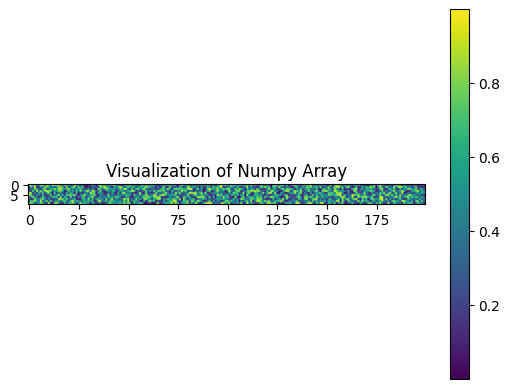

In [ ]:

import matplotlib.pyplot as plt

# Create a random numpy array
array = np.random.rand(10, 200)

# Plot the numpy array as an image
plt.imshow(array, cmap='viridis')
plt.colorbar()
plt.title("Visualization of Numpy Array")
plt.show()

### Applying Glove embeddings to tokenized words

In [ ]:
# code for Glove word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

x = {'text', 'the', 'leader', 'prime',
	'natural', 'language'}

# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# number of unique words in dict.
print("Number of unique words in dictionary=",
	len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

# download glove and unzip it in Notebook.
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

# vocab: 'the': 1, mapping of words with
# integers in seq. 1,2,3..
# embedding: 1->dense vector
def embedding_for_vocab(filepath, word_index,
						embedding_dim):
	vocab_size = len(word_index) + 1

	# Adding again 1 because of reserved 0 index
	embedding_matrix_vocab = np.zeros((vocab_size,
									embedding_dim))

	with open(filepath, encoding="utf8") as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix_vocab[idx] = np.array(
					vector, dtype=np.float32)[:embedding_dim]

	return embedding_matrix_vocab


# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab(
	'../glove.6B.50d.txt', tokenizer.word_index,
embedding_dim)

print("Dense vector for first word is => ",
	embedding_matrix_vocab[1])


# **Bi-LSTM Layer**

## **Draft**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class BiLSTMModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, num_classes):
        super(BiLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True)
        self.fc = nn.Linear(2 * hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.bilstm(x)
        hidden_out = torch.cat((lstm_out[:, -1, :self.hidden_dim], lstm_out[:, 0, self.hidden_dim:]), dim=1)
        output = self.fc(hidden_out)
        return output

# Assuming you have the processed entity and trigger embeddings from previous steps
entity_embeddings = entity_embedding_df['Embedding'].to_list()
trigger_embeddings = trigger_embedding_df['Embedding'].to_list()

# Assuming you have labels or targets for your model
labels = np.array([0, 1, 0, ...])  # Example labels

# Padding sequences
padded_entity_embeddings = pad_sequences(entity_embeddings, maxlen=max_seq_len, dtype='float32')
padded_trigger_embeddings = pad_sequences(trigger_embeddings, maxlen=max_seq_len, dtype='float32')

# Concatenate entity and trigger embeddings
combined_embeddings = np.concatenate((padded_entity_embeddings, padded_trigger_embeddings), axis=2)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(combined_embeddings, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float)

# Define dataset and dataloader
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the BiLSTM model
embedding_dim = 200  # Define your embedding dimension
hidden_dim = 128  # Define your hidden dimension
num_classes = 2  # Define your number of classes
vocab_size = len(word_vectors)  # Define your vocabulary size
bilstm_model = BiLSTMModel(embedding_dim, hidden_dim, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(bilstm_model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    bilstm_model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = bilstm_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Get hidden layer embeddings
with torch.no_grad():
    bilstm_model.eval()
    hidden_layer_embeddings = bilstm_model.embedding(X_train_tensor)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class BiLSTMModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(BiLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.bilstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True)

    def forward(self, x):
        lstm_out, _ = self.bilstm(x)
        return lstm_out

def main():
    # Load GloVe word embeddings
    word_vectors = {}  # Load your GloVe embeddings here

    # Preprocess data and create training batches
    # x_tokenized_list: List of tokenized sentences
    # ei_list: List of entity indices
    # tj_list: List of trigger indices

    # Convert tokens to word vectors
    x_embedding_list = [torch.Tensor([word_vectors[token] for token in tokens]) for tokens in x_tokenized_list]

    # Convert ei_list and tj_list to tensors
    ei_tensor = torch.tensor(ei_list, dtype=torch.long)
    tj_tensor = torch.tensor(tj_list, dtype=torch.long)

    # Create DataLoader for training batches
    train_dataset = TensorDataset(ei_tensor, tj_tensor, *x_embedding_list)
    batch_size = 32
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    embedding_dim = 200
    hidden_dim = 128

    bilstm_model = BiLSTMModel(embedding_dim, hidden_dim)
    criterion = nn.MSELoss()  # You can use a suitable loss function
    optimizer = optim.Adam(bilstm_model.parameters(), lr=0.001)

    num_epochs = 10
    for epoch in range(num_epochs):
        bilstm_model.train()
        for ei_batch, tj_batch, *x_batch in train_dataloader:
            optimizer.zero_grad()

            # Convert x_batch to a padded tensor
            x_padded = nn.utils.rnn.pad_sequence(x_batch, batch_first=True)

            # Pass through the model
            lstm_output = bilstm_model(x_padded)

            # Capture the hidden states for important embeddings (ei and tj)
            important_embeddings = torch.cat((lstm_output[range(len(ei_batch)), ei_batch], lstm_output[range(len(tj_batch)), tj_batch]), dim=1)

            # Further processing or downstream tasks
            # ...

            target = torch.zeros_like(important_embeddings)  # Replace with actual target tensor
            loss = criterion(important_embeddings, target)  # Adjust target according to your task
            loss.backward()
            optimizer.step()

if __name__ == "__main__":
    main()
